# Initial Tasks

## Importing the Necessary Libraries

In [ ]:
!pip install pandas requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
import numpy as np
import random
from scipy.spatial.distance import cdist
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from scipy.spatial import distance

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Random Seed for Consistency

In [ ]:
random.seed(42)
np.random.seed(42)

## Fetching Data
A1, A2 & A3

In [ ]:
def fetch_data():

  url_a1 = 'https://cs.joensuu.fi/sipu/datasets/a1.txt'
  response_a1 = requests.get(url_a1)
  assert response_a1.status_code == 200, f"Request failed with status code {response.status_code}"
  txt_data_a1 = StringIO(response_a1.text)
  df_a1 = pd.read_csv(txt_data_a1, sep='\s+', header=None,names=["x","y"])

  url_a2 = 'https://cs.joensuu.fi/sipu/datasets/a2.txt'
  response_a2 = requests.get(url_a2)
  assert response_a2.status_code == 200, f"Request failed with status code {response.status_code}"
  txt_data_a2 = StringIO(response_a2.text)
  df_a2 = pd.read_csv(txt_data_a2, sep='\s+', header=None,names=["x","y"])

  url_a3 = 'https://cs.joensuu.fi/sipu/datasets/a3.txt'
  response_a3 = requests.get(url_a3)
  assert response_a3.status_code == 200, f"Request failed with status code {response.status_code}"
  txt_data_a3 = StringIO(response_a3.text)
  df_a3 = pd.read_csv(txt_data_a3, sep='\s+', header=None,names=["x","y"])

  return df_a1, df_a2, df_a3

In [ ]:
df_a1, df_a2, df_a3 = fetch_data()

In [ ]:
def fetch_GT():

  file_path_a1 = '/content/drive/My Drive/IE525_Project/a1-ga-cb.txt'
  gt_centroids_a1 = pd.read_csv(file_path_a1, sep='\s+', header=None, names=['x', 'y'])
  gt_centroids_a1['Cluster'] = gt_centroids_a1.index + 1

  file_path_a2 = '/content/drive/My Drive/IE525_Project/a2-ga-cb.txt'
  gt_centroids_a2 = pd.read_csv(file_path_a2, sep='\s+', header=None, names=['x', 'y'])
  gt_centroids_a2['Cluster'] = gt_centroids_a2.index + 1

  file_path_a3 = '/content/drive/My Drive/IE525_Project/a3-ga-cb.txt'
  gt_centroids_a3 = pd.read_csv(file_path_a3, sep='\s+', header=None, names=['x', 'y'])
  gt_centroids_a3['Cluster'] = gt_centroids_a3.index + 1

  file_path_pa1 = '/content/drive/My Drive/IE525_Project/a1-ga.pa'
  with open(file_path_pa1, 'r') as file:
    content = file.readlines()[4:]  # Skip the first 4 lines
  true_clusters = [int(line.strip()) for line in content]
  df_a1_GT = df_a1.copy()
  df_a1_GT["GT_Cluster"] = true_clusters

  file_path_pa2 = '/content/drive/My Drive/IE525_Project/a2-ga.pa'
  with open(file_path_pa2, 'r') as file:
    content = file.readlines()[4:]
  true_clusters = [int(line.strip()) for line in content]
  df_a2_GT = df_a2.copy()
  df_a2_GT["GT_Cluster"] = true_clusters

  file_path_pa3 = '/content/drive/My Drive/IE525_Project/a3-ga.pa'
  with open(file_path_pa3, 'r') as file:
    content = file.readlines()[4:]  # Skip the first 4 lines
  true_clusters = [int(line.strip()) for line in content]
  df_a3_GT = df_a3.copy()
  df_a3_GT["GT_Cluster"] = true_clusters

  frames=[gt_centroids_a1, gt_centroids_a2, gt_centroids_a3, df_a1_GT, df_a2_GT, df_a3_GT]
  for item in frames:
    if item.isna().any().any():
      print("Missing values in", item)

  return gt_centroids_a1, gt_centroids_a2, gt_centroids_a3, df_a1_GT, df_a2_GT, df_a3_GT

In [ ]:
gt_centroids_a1, gt_centroids_a2, gt_centroids_a3, df_a1_GT, df_a2_GT, df_a3_GT = fetch_GT()

# Preliminary Data Analysis

## Basic Information on Data

In [ ]:
def info_data(df, df_name):

  print("--INFORMATION ON ", df_name, "--",sep="")
  print("Lenght of dataset:", len(df))
  print("No of columns/Dimension of data:", df.shape[1])
  print("Data types:", df.dtypes)
  print("Summary statistics:\n", df.describe())
  if df.isna().any().any():
    print("Missing values!")
  print()

In [ ]:
info_data(df_a1,"A1")
info_data(df_a2,"A2")
info_data(df_a3,"A3")

--INFORMATION ON A1--
Lenght of dataset: 3000
No of columns/Dimension of data: 2
Data types: x    int64
y    int64
dtype: object
Summary statistics:
                   x             y
count   3000.000000   3000.000000
mean   35435.065000  50740.626000
std    17393.227853   7658.612752
min        0.000000  32064.000000
25%    21533.000000  45388.750000
50%    35436.000000  50719.500000
75%    52905.500000  57672.000000
max    65535.000000  64978.000000

--INFORMATION ON A2--
Lenght of dataset: 5250
No of columns/Dimension of data: 2
Data types: x    int64
y    int64
dtype: object
Summary statistics:
                   x             y
count   5250.000000   5250.000000
mean   32346.450667  43591.755048
std    17991.187490  11794.031233
min        0.000000  20390.000000
25%    15825.250000  34480.000000
50%    34303.000000  44588.000000
75%    46891.500000  53907.250000
max    65535.000000  64142.000000

--INFORMATION ON A3--
Lenght of dataset: 7500
No of columns/Dimension of data: 2
Data 

In [ ]:
def gt_info(df_GT, df_name):

  cluster_counts = df_GT.groupby('GT_Cluster').size()
  average_instances = cluster_counts.mean()
  smallest_cluster = cluster_counts.min()
  largest_cluster = cluster_counts.max()
  print("---FOR THE " +df_name + " DATASET---")
  print(f"Average number of instances in a cluster: {average_instances}")
  print(f"Number of instances in the smallest cluster: {smallest_cluster}")
  print(f"Number of instances in the largest cluster: {largest_cluster}")
  print()

In [ ]:
gt_info(df_a1_GT, "A1")
gt_info(df_a2_GT, "A2")
gt_info(df_a3_GT, "A3")

---FOR THE A1 DATASET---
Average number of instances in a cluster: 150.0
Number of instances in the smallest cluster: 142
Number of instances in the largest cluster: 159

---FOR THE A2 DATASET---
Average number of instances in a cluster: 150.0
Number of instances in the smallest cluster: 143
Number of instances in the largest cluster: 158

---FOR THE A3 DATASET---
Average number of instances in a cluster: 150.0
Number of instances in the smallest cluster: 142
Number of instances in the largest cluster: 159



## Scatter Plots

In [ ]:
def scatter_plot(df,df_name):

  plt.scatter(df['x'], df['y'], c="black",s=2)
  plt.title('Scatter Plot of '+df_name)
  plt.xlabel('X Coordinates')
  plt.ylabel("Y Coordinates")
  plt.grid()
  plt.show()
  print()

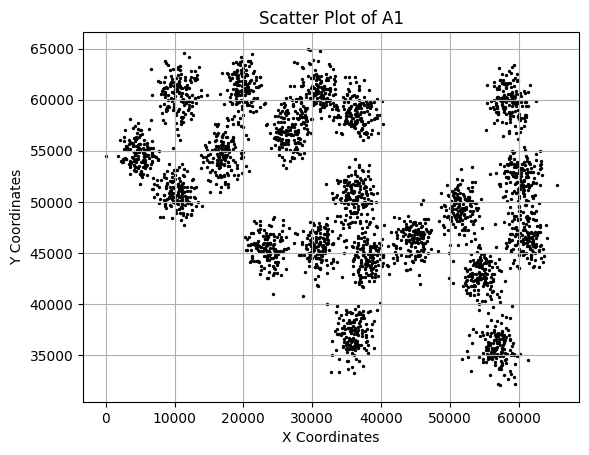

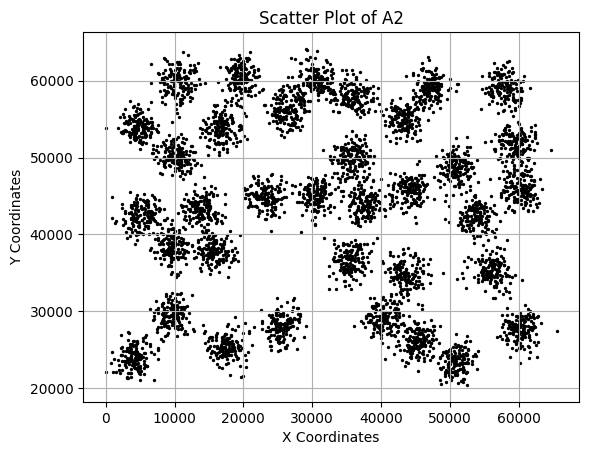

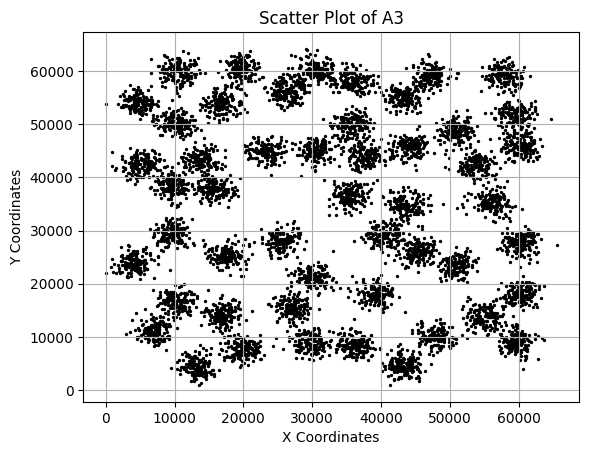

In [ ]:
scatter_plot(df_a1, "A1")
scatter_plot(df_a2, "A2")
scatter_plot(df_a3, "A3")

In [ ]:
def scatter_plot_with_centroid(df,df_centroids, df_name):

  plt.scatter(df['x'], df['y'], c='black', s=2, label='Data Points')
  plt.scatter(df_centroids['x'], df_centroids['y'], c='r',s=3, label='GT Centroids')
  plt.legend(loc="best")
  plt.grid()
  plt.title('Scatter Plot of ' + df_name + ' w/ GT Centroids')
  plt.xlabel('X Coordinates')
  plt.ylabel('Y Coordinates')
  plt.show()
  print()

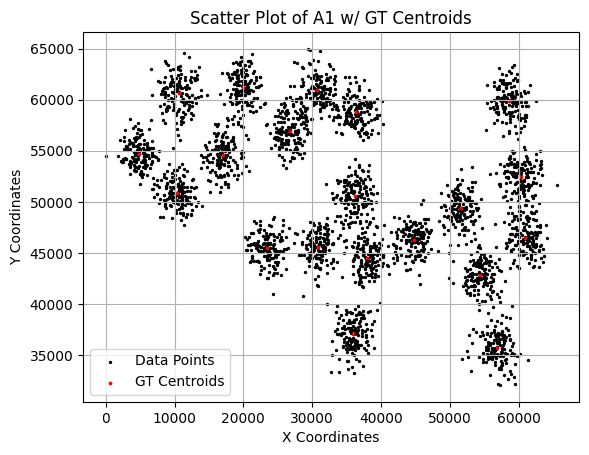

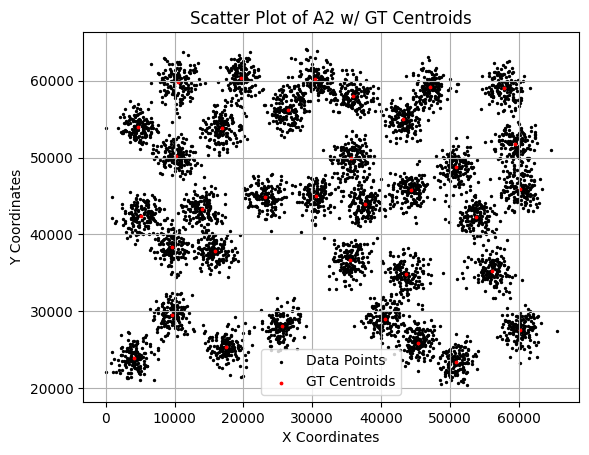

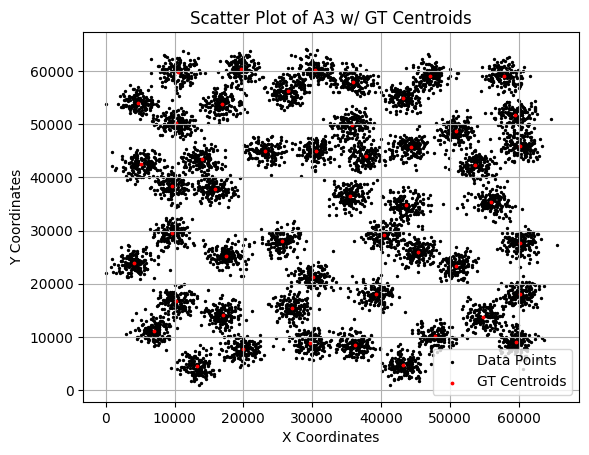

In [ ]:
scatter_plot_with_centroid(df_a1,gt_centroids_a1, "A1")
scatter_plot_with_centroid(df_a2,gt_centroids_a2, "A2")
scatter_plot_with_centroid(df_a3,gt_centroids_a3, "A3")

In [ ]:
def scatter_with_cluster(df,df_GT,df_centroids,df_name):

  clusters = df_GT['GT_Cluster'].unique()
  colormap = plt.cm.get_cmap('tab20')
  for i, cluster in enumerate(clusters):
      cluster_data = df_GT[df_GT['GT_Cluster'] == cluster]
      plt.scatter(cluster_data['x'], cluster_data['y'], color=colormap(i), s=3)
  plt.scatter(df_centroids['x'], df_centroids['y'], color='red', label='GT Centroids', s=5)
  plt.legend(loc="lower left")
  plt.grid()
  plt.xlabel('X Coordinates')
  plt.ylabel('Y Coordinates')
  plt.title('Ground Truth Clusters & Centroids of ' + df_name)
  plt.show()
  print()

<ipython-input-17-e0b97444d383>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20')


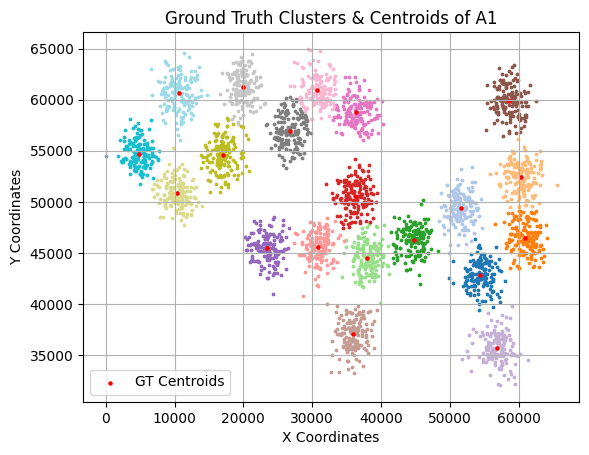

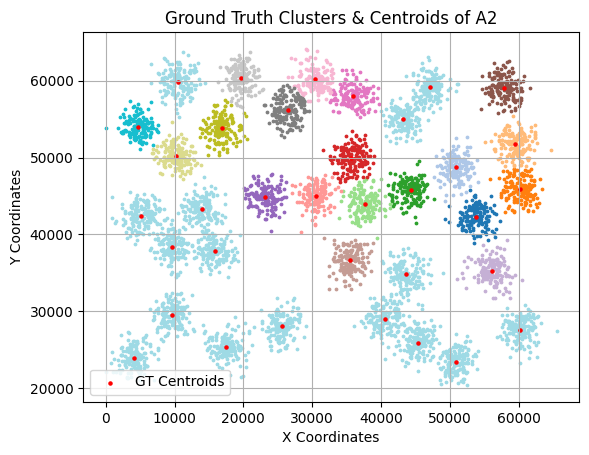

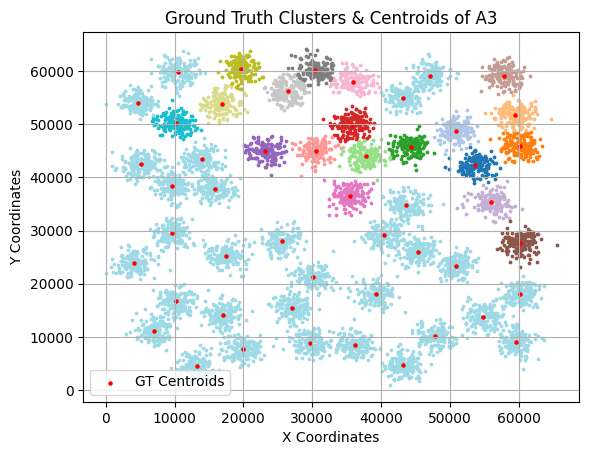

In [ ]:
scatter_with_cluster(df_a1,df_a1_GT,gt_centroids_a1,"A1")
scatter_with_cluster(df_a2,df_a2_GT,gt_centroids_a2,"A2")
scatter_with_cluster(df_a3,df_a3_GT,gt_centroids_a3,"A3")

## Box Plots

Not included in the report as box plots indicate outliers but not isolated points

In [ ]:
def boxplots(df,df_name):

  boxplot = df.boxplot(column=['x', 'y'], color="black")
  plt.title('Boxplot for ' + df_name)
  plt.ylabel('Coordinates')
  plt.xticks([1, 2], ['for X Coordinates', 'for Y Coordinates'])
  plt.show()
  print()


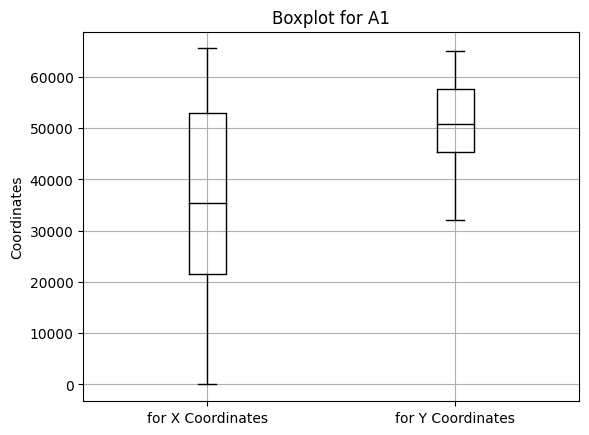

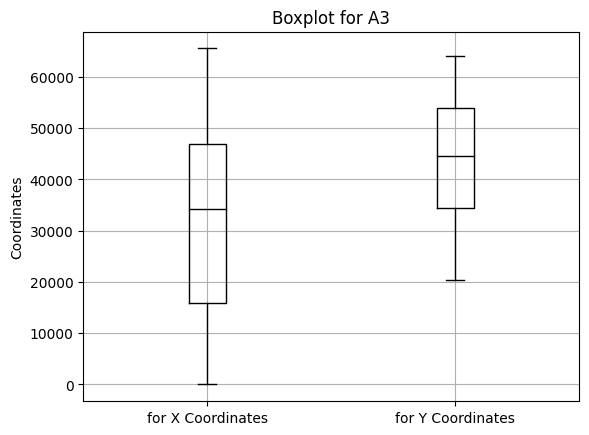

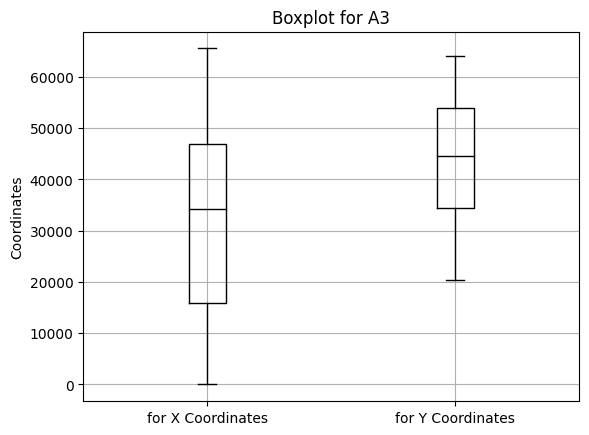

In [ ]:
boxplots(df_a1,"A1")
boxplots(df_a2,"A3")
boxplots(df_a2,"A3")

# Noise Points

## Noise Detection

In [ ]:
def check_noise(df,no_neighbors, df_name):

  lof = LocalOutlierFactor(n_neighbors=no_neighbors)
  y_pred = lof.fit_predict(df)
  n_outliers = (y_pred == -1).sum()
  print("Number of outliers for "+df_name + ":", n_outliers)
  print()

  df["outlier"]=y_pred
  colors = df['outlier'].map({1: 'black', -1: 'magenta'})
  plt.scatter(df['x'], df['y'], color=colors,s=2)
  plt.legend(loc="best")
  plt.grid()
  #plt.xlabel('X Coordinates')
  #plt.ylabel('Y Coordinates')
  plt.title('Scatter Plot of '+ df_name)
  plt.show()
  print()


Number of outliers for A1: 87



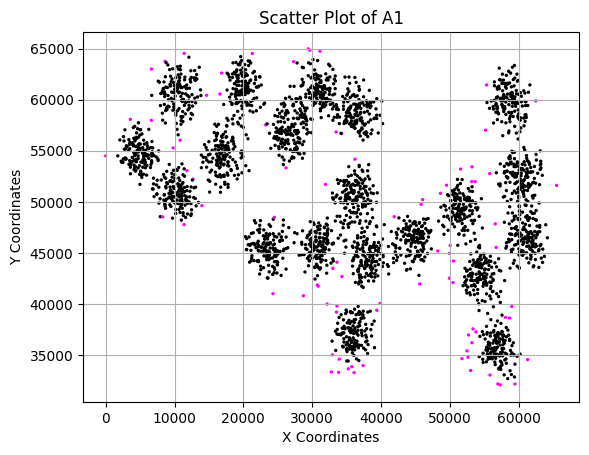


Number of outliers for A2: 204



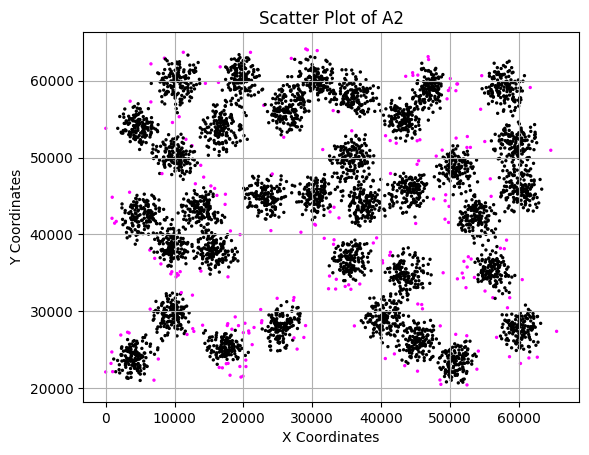


Number of outliers for A3: 279



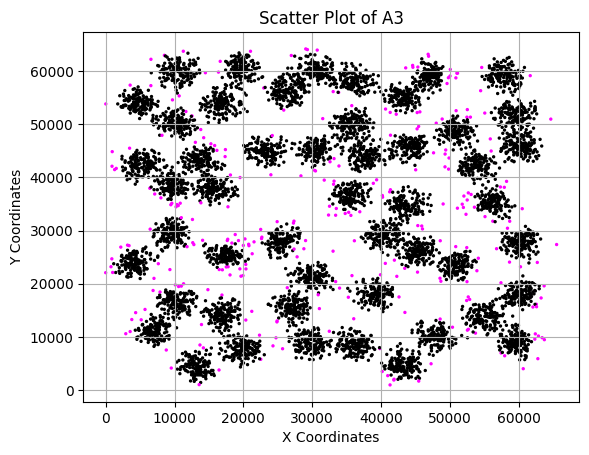

In [ ]:
check_noise(df_a1,no_neighbors=20, df_name="A1")
check_noise(df_a2,no_neighbors=20, df_name="A2")
check_noise(df_a3,no_neighbors=20, df_name="A3")

Number of outliers for A1: 56



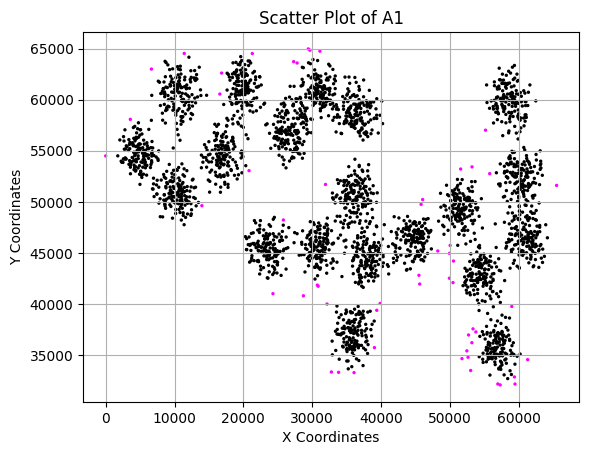


Number of outliers for A2: 134



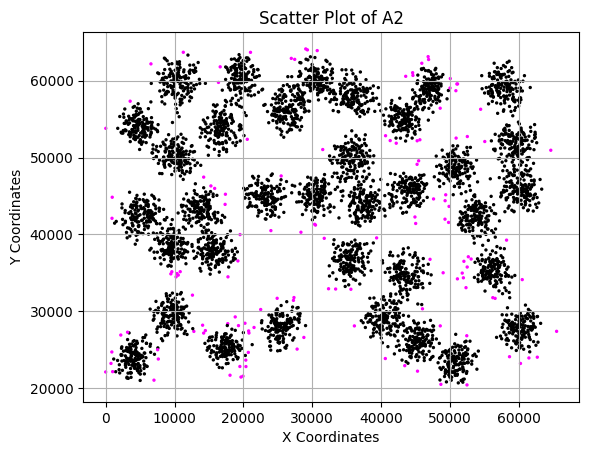


Number of outliers for A3: 192



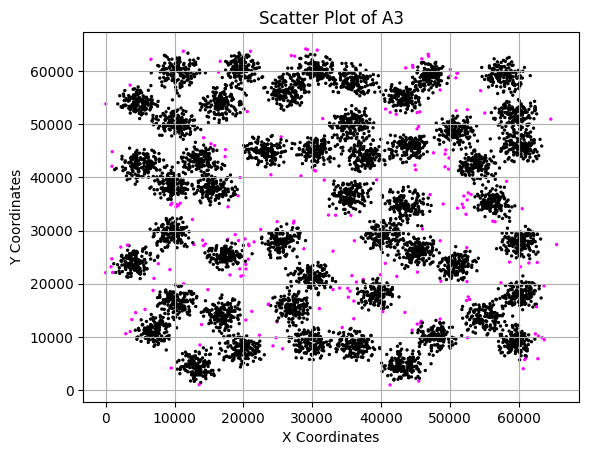

In [ ]:
check_noise(df_a1,no_neighbors=50, df_name="A1")
check_noise(df_a2,no_neighbors=50, df_name="A2")
check_noise(df_a3,no_neighbors=50, df_name="A3")

Number of outliers for A1: 34



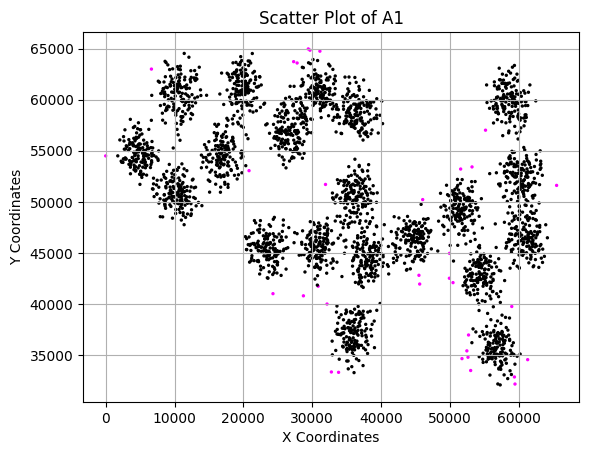


Number of outliers for A2: 60



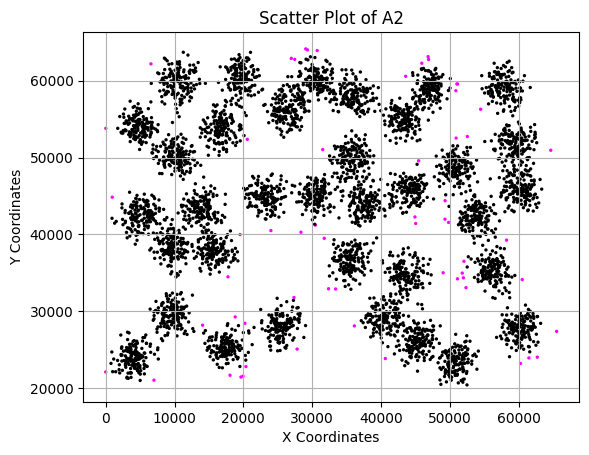


Number of outliers for A3: 81



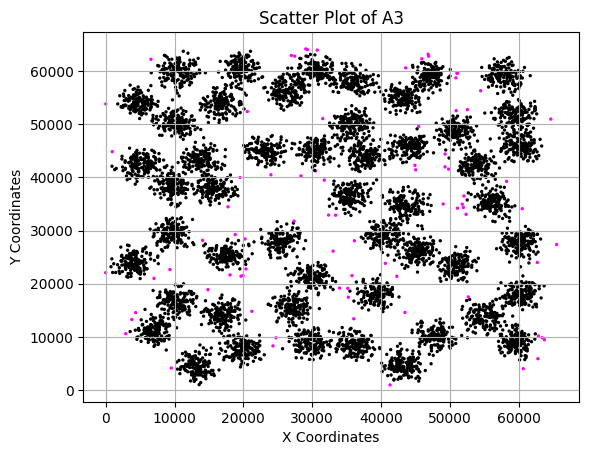

In [ ]:
check_noise(df_a1,no_neighbors=75, df_name="A1")
check_noise(df_a2,no_neighbors=75, df_name="A2")
check_noise(df_a3,no_neighbors=75, df_name="A3")

## Generating Noise Points

In [ ]:
def generate_noise_point(centroid, noise_radius):
    x, y = centroid
    noise_x = np.random.uniform(x - noise_radius, x + noise_radius)
    noise_y = np.random.uniform(y - noise_radius, y + noise_radius)
    return noise_x, noise_y

In [ ]:
def add_noise(df_GT,centroid_df, num_noise_points, noise_radius):
  noise_points = []
  for idx, centroid_row in centroid_df.iterrows():
      centroid = (centroid_row['x'], centroid_row['y'])
      true_cluster = idx + 1
      for _ in range(num_noise_points):
          noise_point = generate_noise_point(centroid, noise_radius)
          noise_points.append(noise_point + (true_cluster,))

  columns = ['x', 'y', 'GT_Cluster']
  noise_df = pd.DataFrame(noise_points, columns=columns)
  added_noise_df = pd.concat([df_GT, noise_df], ignore_index=True)
  return added_noise_df

In [ ]:
df_a1_small_noise=add_noise(df_a1_GT,gt_centroids_a1,5,5000)
check_noise(df=df_a1_small_noise,no_neighbors=50, df_name="A1 w/ added Noise")

In [ ]:
df_a1_large_noise=add_noise(df_a1_GT,gt_centroids_a1,5,7500)
check_noise(df=df_a1_large_noise,no_neighbors=50, df_name="A1 w/ added Noise")

In [ ]:
df_a2_small_noise=add_noise(df_a2_GT,gt_centroids_a2,5,5000)
check_noise(df=df_a2_small_noise,no_neighbors=50, df_name="A2 w/ added Noise")

In [ ]:
df_a2_large_noise=add_noise(df_a2_GT,gt_centroids_a2,5,7500)
check_noise(df=df_a2_large_noise,no_neighbors=50, df_name="A2 w/ added Noise")

In [ ]:
df_a3_small_noise=add_noise(df_a3_GT,gt_centroids_a3,5,5000)
check_noise(df=df_a3_small_noise,no_neighbors=50, df_name="A3 w/ added Noise")

Number of outliers for A3 w/ added Noise: 276



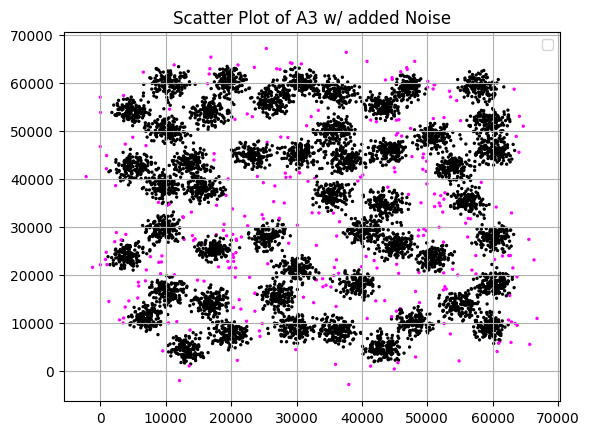

In [ ]:
df_a3_large_noise=add_noise(df_a3_GT,gt_centroids_a3,5,7500)
check_noise(df=df_a3_large_noise,no_neighbors=50, df_name="A3 w/ added Noise")

# K-Means Pipeline

In [ ]:
def weighted_kmeans(data, centroids,k, alpha, distance_metric='euclidean', max_iterations=100):

    for iter in range(max_iterations):
        # Assign clusters based on closest centroid
        clusters = assign_clusters(data, centroids, distance_metric)

        # Update centroids based on weighted mean
        new_centroids = update_centroids(data, clusters, centroids, alpha, distance_metric)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters

def assign_clusters(data, centroids, distance_metric):
    # Calculate distances from each data point to each centroid
    if distance_metric == 'mahalanobis':
        clusters = []
        for x in data:
            distances_to_centroids = [distance.mahalanobis(x, centroid, np.linalg.pinv(np.cov(data.T))) for centroid in centroids]
            clusters.append(np.argmin(distances_to_centroids))
        clusters = np.array(clusters)
    else:
        distances_to_centroids = distance.cdist(data, centroids, 'euclidean')
        clusters = np.argmin(distances_to_centroids, axis=1)

    return clusters

from sklearn.neighbors import LocalOutlierFactor

def update_centroids(data, clusters, centroids, alpha, distance_metric):
    new_centroids = []

    # Define LOF for detecting outliers
    lof = LocalOutlierFactor(n_neighbors=50)

    for i in range(centroids.shape[0]):
        points_in_cluster = data[clusters == i]

        # Identify outliers based on LOF
        outlier_factor = lof.fit_predict(points_in_cluster)
        is_outlier = (outlier_factor == -1)

        # Assign weights
        weights = np.where(is_outlier, alpha, 1)

        # Calculate weighted average for each dimension
        weighted_average = np.average(points_in_cluster, axis=0, weights=weights)

        new_centroids.append(weighted_average)

    return np.array(new_centroids)



In [ ]:
def evaluation_centroids(gt_centroids,centroids,df_name,epsilon):

  print("---RESULTS FOR ", df_name,"---",sep="")
  print()

  df_centroid_pred = pd.DataFrame(centroids, columns=['x_Centroid_Pred', 'y_Centroid_Pred'])
  df_results_centroids= df_centroid_pred.join(gt_centroids)
  df_results_centroids.rename(columns={'x': 'x_Centroid_GT', 'y': 'y_Centroid_GT'}, inplace=True)

  plt.scatter(df_centroid_pred["x_Centroid_Pred"],df_centroid_pred["y_Centroid_Pred"], c='blue', s=35, label='Predicted Centroid',marker="x")
  plt.scatter(gt_centroids['x'], gt_centroids['y'], c='red', s=20, label='GT Centroid')
  plt.legend(loc="best")
  plt.grid()
  plt.title('GT Centroids vs Predicted Centroids for '+ df_name)
  plt.xlabel('X Coordinates')
  plt.ylabel('Y Coordinates')
  plt.show()
  print()

  distances = []
  for row in centroids:
      dist = [distance.euclidean(row, (x, y)) for x, y in zip(gt_centroids['x'], gt_centroids['y'])]
      distances.append(min(dist))

  # Calculate average distance
  average_distance = np.mean(distances)

  count= sum(1 for dist in distances if dist <= epsilon)
  percentage = count / len(distances) * 100  # divide by total number of instances and convert to percentage

  print('Average Euclidean distance btw predicted & GT centroids:', average_distance)
  print()
  print("Percentage of centroids in radius of GT centroids within epsilon:",format(percentage,".3f"),"%",sep="")



#Model Evaluation

## A-Sets

###A1


Silhouette Score:  0.5247116805983105

Adjusted Rand Index (ARI): 0.858487470108841

---RESULTS FOR A1 euclidean alpha 1---



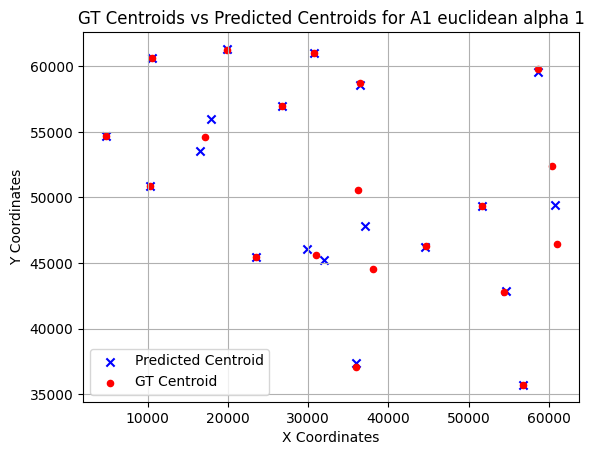


Average Euclidean distance btw predicted & GT centroids: 610.1123267704739

Percentage of centroids in radius of GT centroids within epsilon:70.000%

Silhouette Score:  0.568587292134029

Adjusted Rand Index (ARI): 0.9270897817558084

---RESULTS FOR A1 euclidean alpha 0.75---



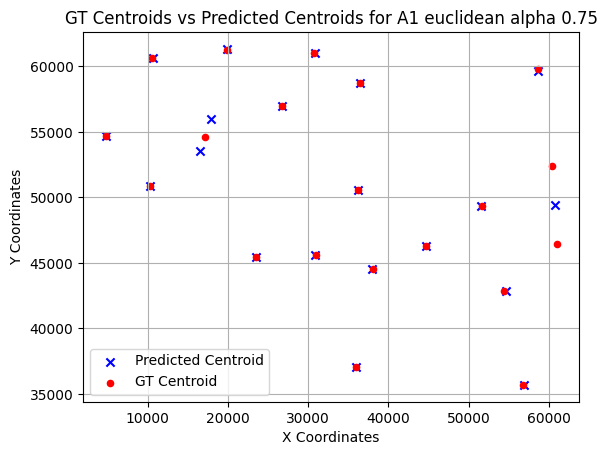


Average Euclidean distance btw predicted & GT centroids: 325.22004387008315

Percentage of centroids in radius of GT centroids within epsilon:85.000%

Silhouette Score:  0.5686622797672196

Adjusted Rand Index (ARI): 0.9274354166441262

---RESULTS FOR A1 euclidean alpha 0.5---



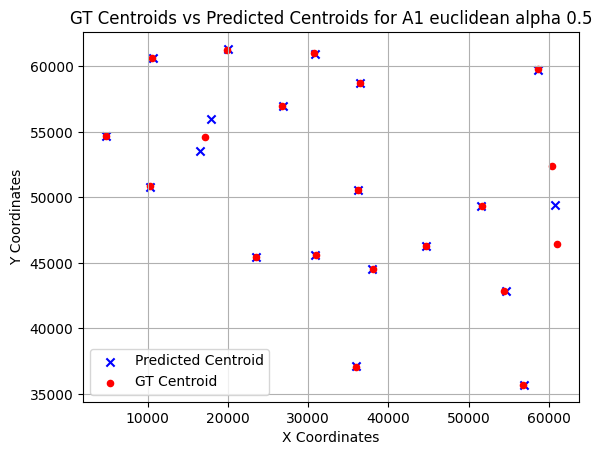


Average Euclidean distance btw predicted & GT centroids: 330.5711697403456

Percentage of centroids in radius of GT centroids within epsilon:85.000%

Silhouette Score:  0.49105872692223845

Adjusted Rand Index (ARI): 0.8490965769203245

---RESULTS FOR A1 mahalanobis alpha 1---



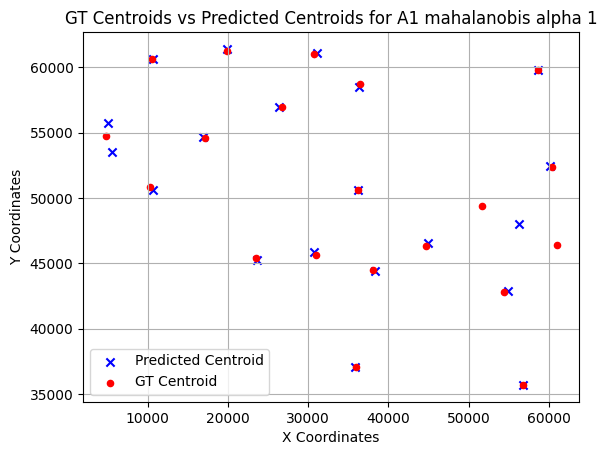


Average Euclidean distance btw predicted & GT centroids: 561.0564071090647

Percentage of centroids in radius of GT centroids within epsilon:85.000%

Silhouette Score:  0.4932356748027492

Adjusted Rand Index (ARI): 0.8519159710815972

---RESULTS FOR A1 mahalanobis alpha 0.75---



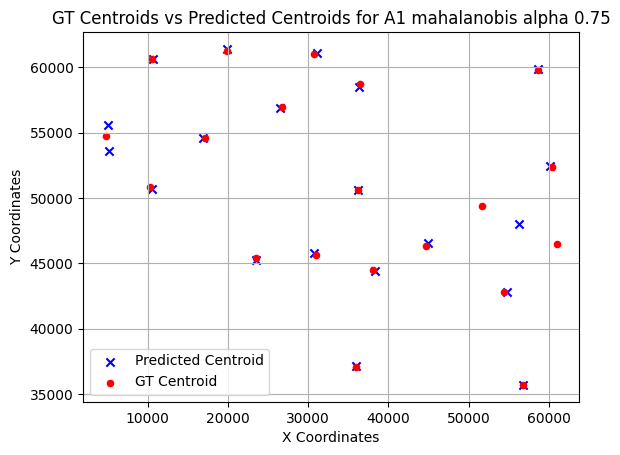


Average Euclidean distance btw predicted & GT centroids: 512.5218876429299

Percentage of centroids in radius of GT centroids within epsilon:85.000%

Silhouette Score:  0.4964329931576341

Adjusted Rand Index (ARI): 0.8567622553733403

---RESULTS FOR A1 mahalanobis alpha 0.5---



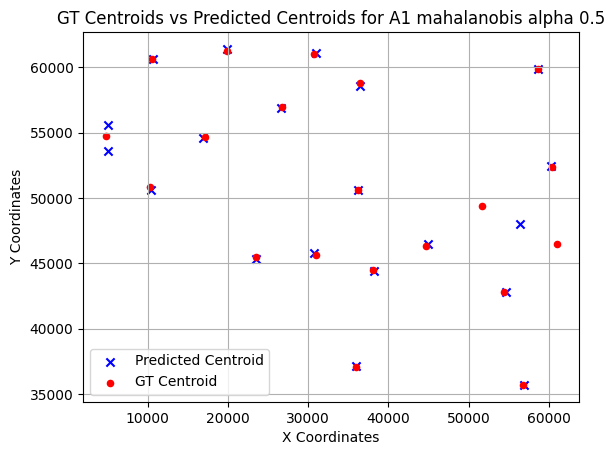


Average Euclidean distance btw predicted & GT centroids: 476.56092495625336

Percentage of centroids in radius of GT centroids within epsilon:85.000%


In [ ]:
X = df_a1.iloc[:, :2].values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=20, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print()
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=20, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    print()
    ground_truth_clusters = df_a1_GT['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()
    evaluation_centroids(gt_centroids_a1,model_centroids,"A1 "+a +" alpha "+str(b), epsilon=700)

### A2


Silhouette Score:  0.5111029813233257

Adjusted Rand Index (ARI): 0.8096296328589244

---RESULTS FOR A2 euclidean alpha 1---



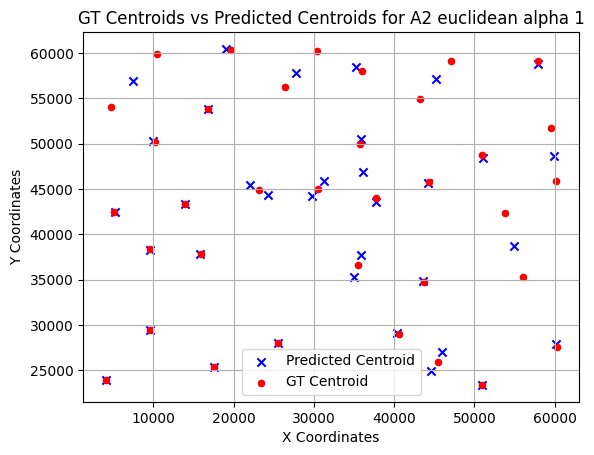


Average Euclidean distance btw predicted & GT centroids: 924.4748325674309

Percentage of centroids in radius of GT centroids within epsilon:60.000%

Silhouette Score:  0.5113306963232445

Adjusted Rand Index (ARI): 0.8084131757777443

---RESULTS FOR A2 euclidean alpha 0.75---



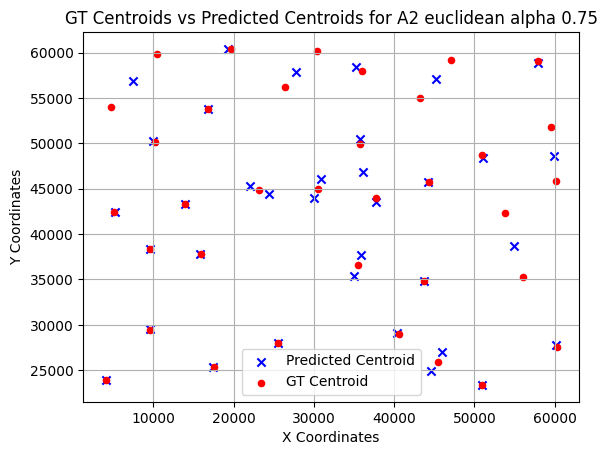


Average Euclidean distance btw predicted & GT centroids: 920.7567533610921

Percentage of centroids in radius of GT centroids within epsilon:60.000%

Silhouette Score:  0.5113975470591595

Adjusted Rand Index (ARI): 0.8092237259952305

---RESULTS FOR A2 euclidean alpha 0.5---



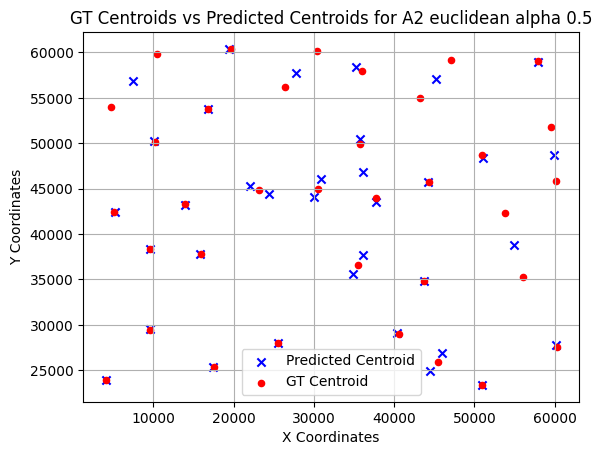


Average Euclidean distance btw predicted & GT centroids: 910.155679030936

Percentage of centroids in radius of GT centroids within epsilon:60.000%

Silhouette Score:  0.5051048294136354

Adjusted Rand Index (ARI): 0.8180210790585309

---RESULTS FOR A2 mahalanobis alpha 1---



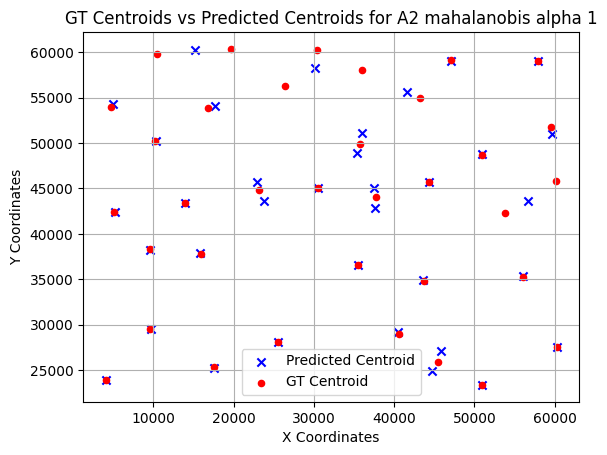


Average Euclidean distance btw predicted & GT centroids: 687.6475966969513

Percentage of centroids in radius of GT centroids within epsilon:68.571%

Silhouette Score:  0.5068123939877639

Adjusted Rand Index (ARI): 0.8239068315571948

---RESULTS FOR A2 mahalanobis alpha 0.75---



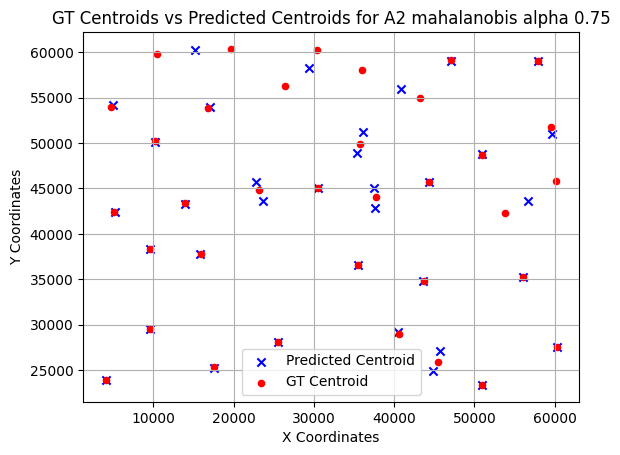


Average Euclidean distance btw predicted & GT centroids: 696.9667947383617

Percentage of centroids in radius of GT centroids within epsilon:68.571%

Silhouette Score:  0.5070213083508693

Adjusted Rand Index (ARI): 0.8239239943458901

---RESULTS FOR A2 mahalanobis alpha 0.5---



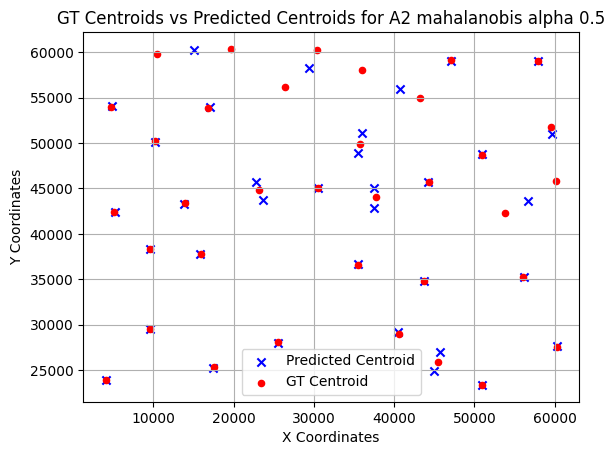


Average Euclidean distance btw predicted & GT centroids: 695.9484975366566

Percentage of centroids in radius of GT centroids within epsilon:68.571%


In [ ]:
X = df_a2.iloc[:, :2].values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=35, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print()
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=35, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    print()
    ground_truth_clusters = df_a2_GT['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()
    evaluation_centroids(gt_centroids_a2,model_centroids,"A2 "+a +" alpha "+str(b), epsilon=950)

### A3

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (18). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.541566469868951

Adjusted Rand Index (ARI): 0.8698344885620897

---RESULTS FOR A3 euclidean alpha 1---



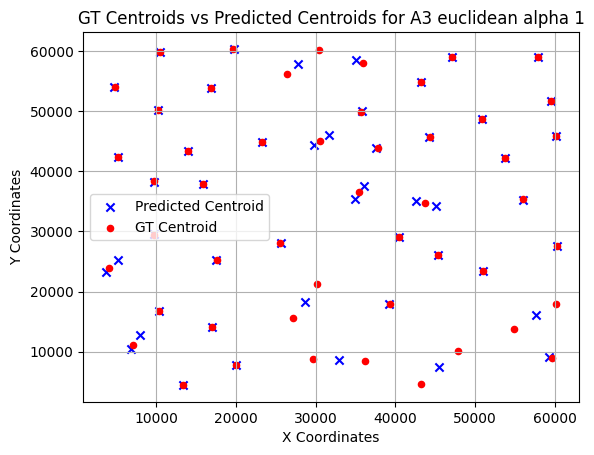


Average Euclidean distance btw predicted & GT centroids: 615.6614692624039

Percentage of centroids in radius of GT centroids within epsilon:80.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (18). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.541933397871926

Adjusted Rand Index (ARI): 0.8696492380884259

---RESULTS FOR A3 euclidean alpha 0.75---



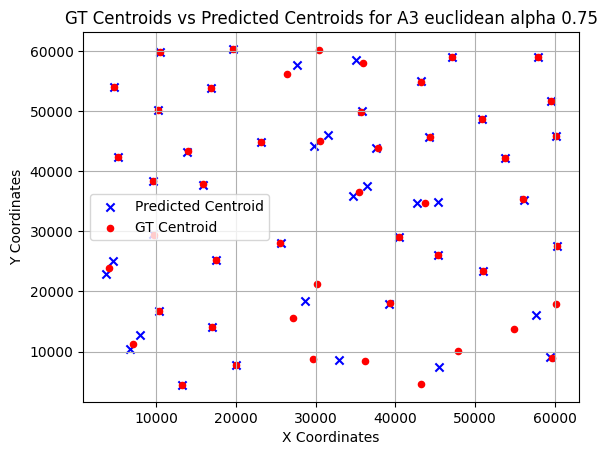


Average Euclidean distance btw predicted & GT centroids: 610.1371043224514

Percentage of centroids in radius of GT centroids within epsilon:82.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (18). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5419500669494522

Adjusted Rand Index (ARI): 0.8702381644459977

---RESULTS FOR A3 euclidean alpha 0.5---



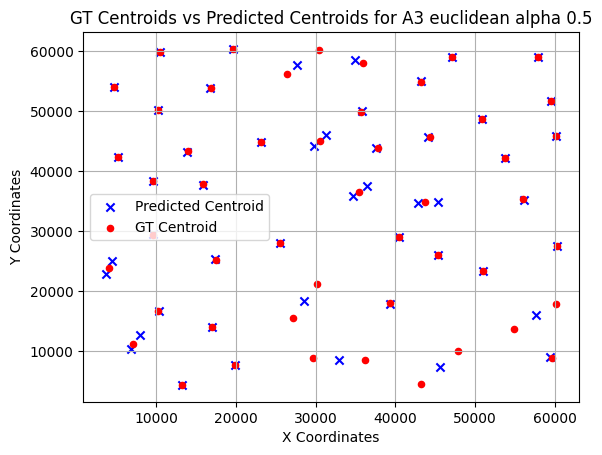


Average Euclidean distance btw predicted & GT centroids: 610.3396560741861

Percentage of centroids in radius of GT centroids within epsilon:82.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (18). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5408145667824866

Adjusted Rand Index (ARI): 0.8687119249981251

---RESULTS FOR A3 mahalanobis alpha 1---



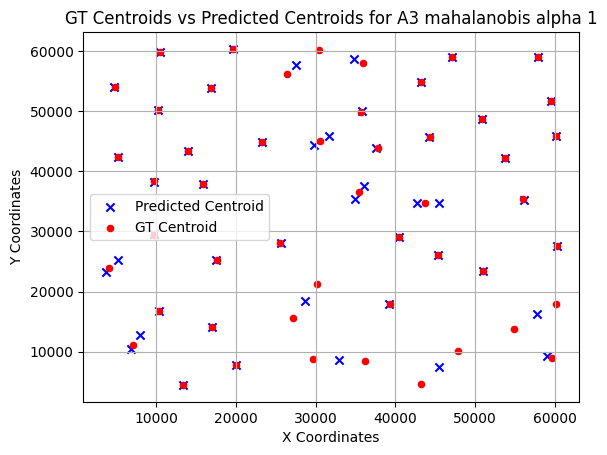


Average Euclidean distance btw predicted & GT centroids: 618.9255520597121

Percentage of centroids in radius of GT centroids within epsilon:78.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (18). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5367236139674589

Adjusted Rand Index (ARI): 0.8647004599497619

---RESULTS FOR A3 mahalanobis alpha 0.75---



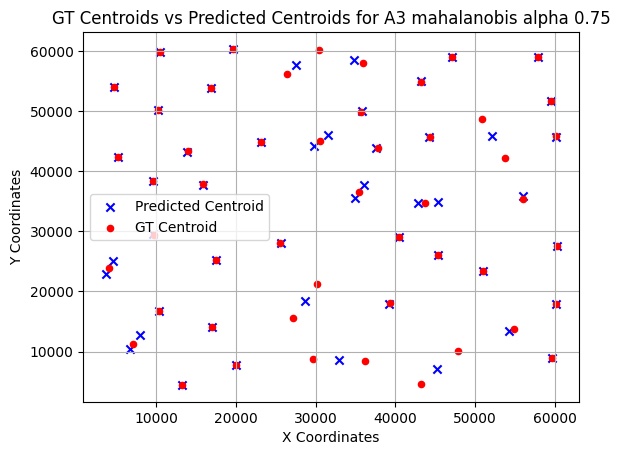


Average Euclidean distance btw predicted & GT centroids: 615.7492923307268

Percentage of centroids in radius of GT centroids within epsilon:80.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (18). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5374196538743606

Adjusted Rand Index (ARI): 0.8673415608304295

---RESULTS FOR A3 mahalanobis alpha 0.5---



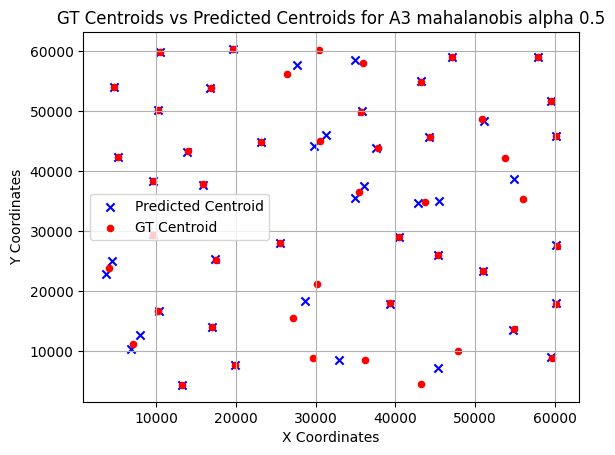


Average Euclidean distance btw predicted & GT centroids: 621.6058861898168

Percentage of centroids in radius of GT centroids within epsilon:84.000%


In [ ]:
X = df_a3.iloc[:, :2].values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=50, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print()
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=50, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    print()
    ground_truth_clusters = df_a3_GT['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()
    evaluation_centroids(gt_centroids_a3,model_centroids,"A3 "+a +" alpha "+str(b), epsilon=1250)

## A Sets With Added Noise

### A1

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (3). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (8). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.49525393879106266

Adjusted Rand Index (ARI): 0.7577802138205083

---RESULTS FOR A1 SMALL NOISE euclidean alpha 1---



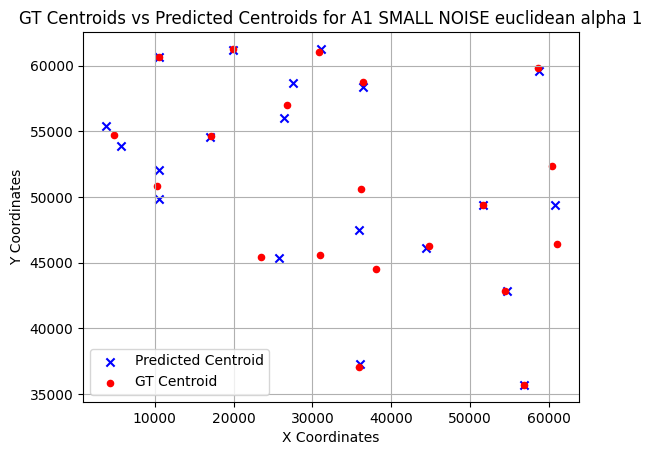


Average Euclidean distance btw predicted & GT centroids: 915.1728860725358

Percentage of centroids in radius of GT centroids within epsilon:55.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (3). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (8). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.4951631945530119

Adjusted Rand Index (ARI): 0.7579784359346335

---RESULTS FOR A1 SMALL NOISE euclidean alpha 0.75---



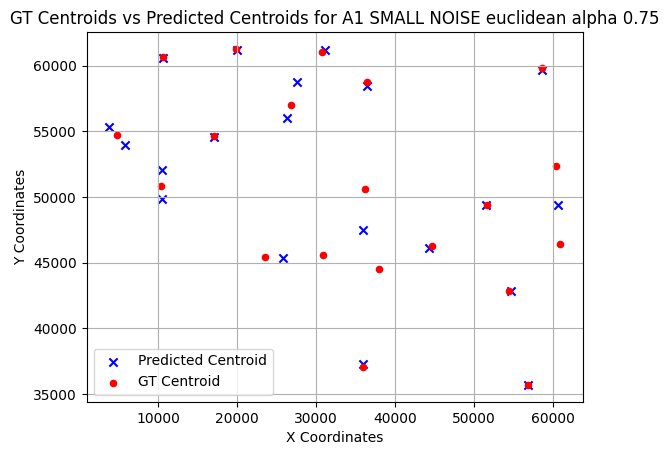


Average Euclidean distance btw predicted & GT centroids: 902.2197424753552

Percentage of centroids in radius of GT centroids within epsilon:55.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (3). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (8). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.4951631945530119

Adjusted Rand Index (ARI): 0.7579784359346335

---RESULTS FOR A1 SMALL NOISE euclidean alpha 0.5---



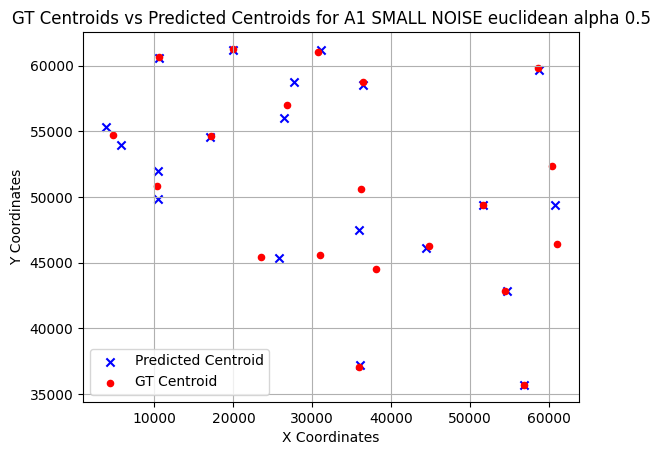


Average Euclidean distance btw predicted & GT centroids: 888.7954792996668

Percentage of centroids in radius of GT centroids within epsilon:55.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.45052644498117855

Adjusted Rand Index (ARI): 0.7897384548223209

---RESULTS FOR A1 SMALL NOISE mahalanobis alpha 1---



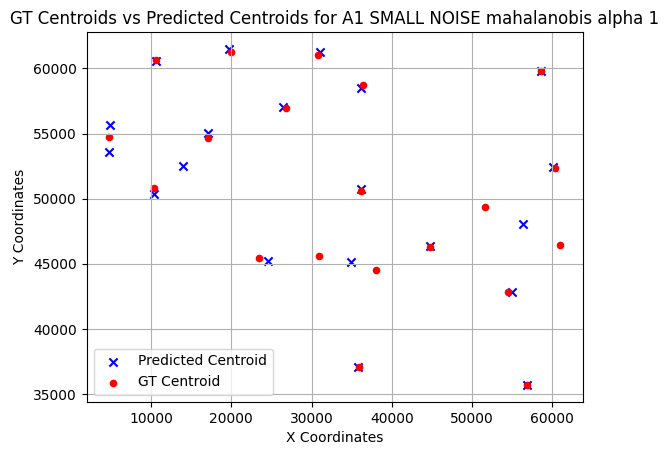


Average Euclidean distance btw predicted & GT centroids: 919.9548144561425

Percentage of centroids in radius of GT centroids within epsilon:70.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.4521686213338924

Adjusted Rand Index (ARI): 0.7907938542270915

---RESULTS FOR A1 SMALL NOISE mahalanobis alpha 0.75---



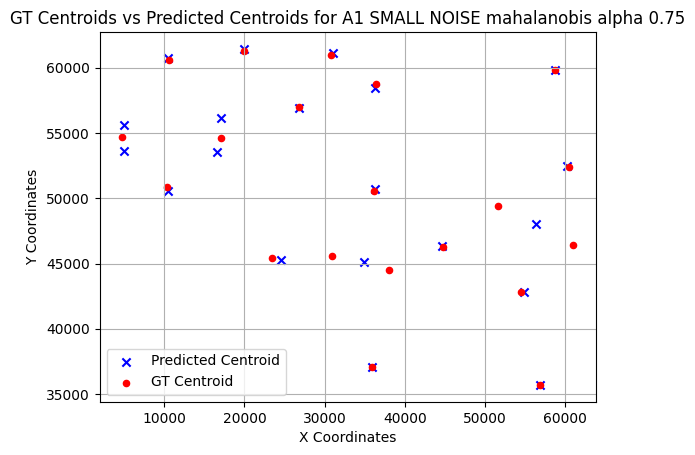


Average Euclidean distance btw predicted & GT centroids: 809.2324314170427

Percentage of centroids in radius of GT centroids within epsilon:65.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.4532140876812871

Adjusted Rand Index (ARI): 0.7919140995661449

---RESULTS FOR A1 SMALL NOISE mahalanobis alpha 0.5---



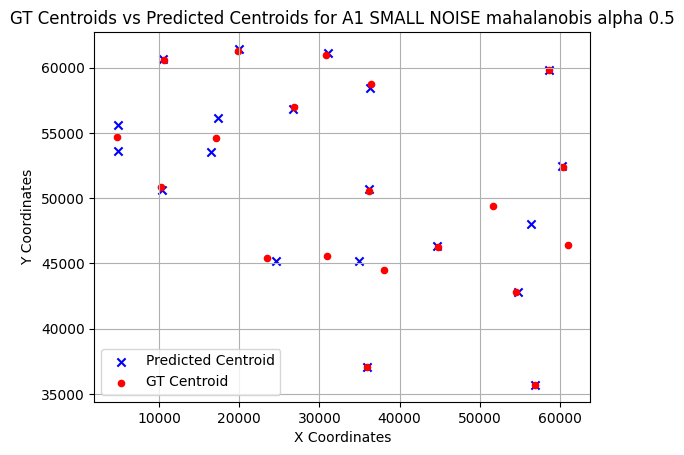


Average Euclidean distance btw predicted & GT centroids: 800.4833769508815

Percentage of centroids in radius of GT centroids within epsilon:65.000%


In [ ]:
X = df_a1_small_noise.iloc[:, :2].values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=20, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print()
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=20, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    print()
    ground_truth_clusters = df_a1_small_noise['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()
    evaluation_centroids(gt_centroids_a1,model_centroids,"A1 SMALL NOISE "+a +" alpha "+str(b), epsilon=700)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (3). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (8). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.49525393879106266

Adjusted Rand Index (ARI): 0.7577802138205083

---RESULTS FOR A1 SMALL NOISE euclidean alpha 1---



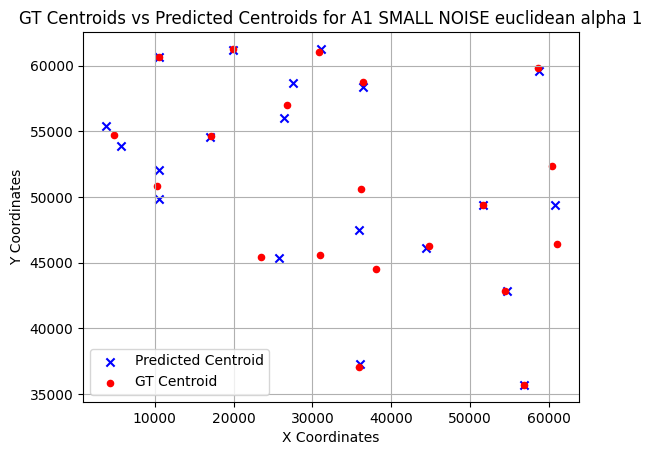


Average Euclidean distance btw predicted & GT centroids: 915.1728860725358

Percentage of centroids in radius of GT centroids within epsilon:55.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (3). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (8). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.4951631945530119

Adjusted Rand Index (ARI): 0.7579784359346335

---RESULTS FOR A1 SMALL NOISE euclidean alpha 0.75---



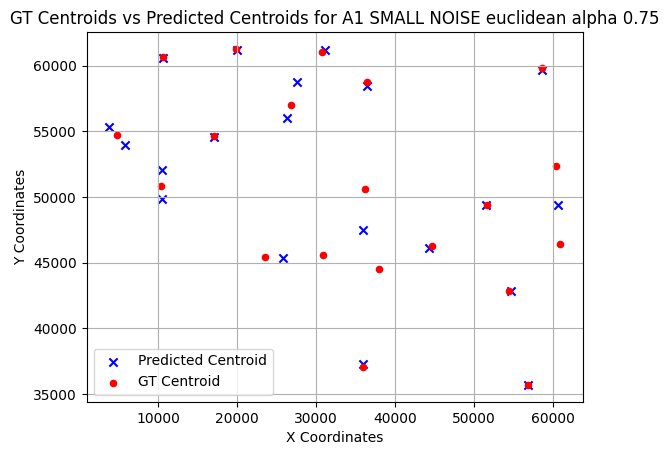


Average Euclidean distance btw predicted & GT centroids: 902.2197424753552

Percentage of centroids in radius of GT centroids within epsilon:55.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (3). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (8). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.4951631945530119

Adjusted Rand Index (ARI): 0.7579784359346335

---RESULTS FOR A1 SMALL NOISE euclidean alpha 0.5---



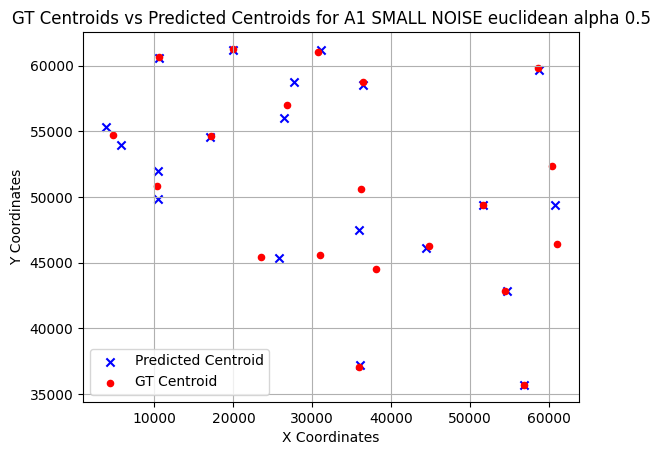


Average Euclidean distance btw predicted & GT centroids: 888.7954792996668

Percentage of centroids in radius of GT centroids within epsilon:55.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.45052644498117855

Adjusted Rand Index (ARI): 0.7897384548223209

---RESULTS FOR A1 SMALL NOISE mahalanobis alpha 1---



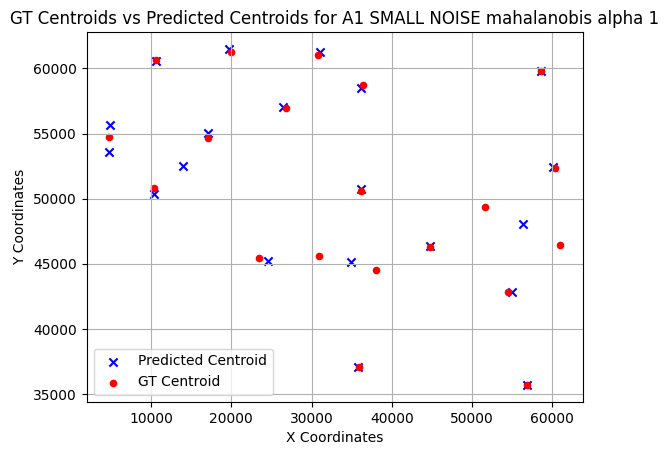


Average Euclidean distance btw predicted & GT centroids: 919.9548144561425

Percentage of centroids in radius of GT centroids within epsilon:70.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.4521686213338924

Adjusted Rand Index (ARI): 0.7907938542270915

---RESULTS FOR A1 SMALL NOISE mahalanobis alpha 0.75---



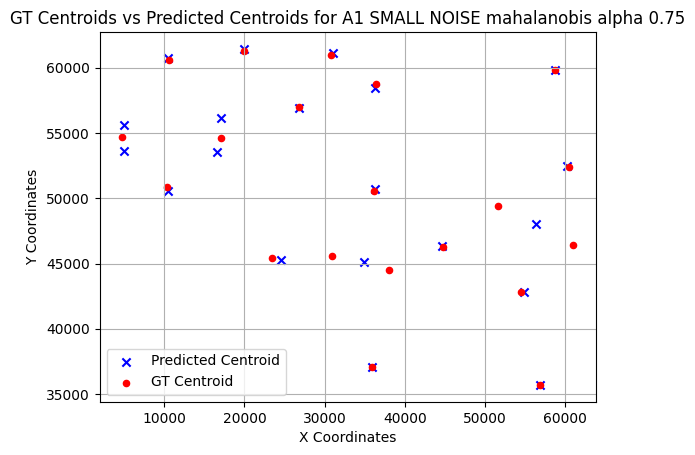


Average Euclidean distance btw predicted & GT centroids: 809.2324314170427

Percentage of centroids in radius of GT centroids within epsilon:65.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.4532140876812871

Adjusted Rand Index (ARI): 0.7919140995661449

---RESULTS FOR A1 SMALL NOISE mahalanobis alpha 0.5---



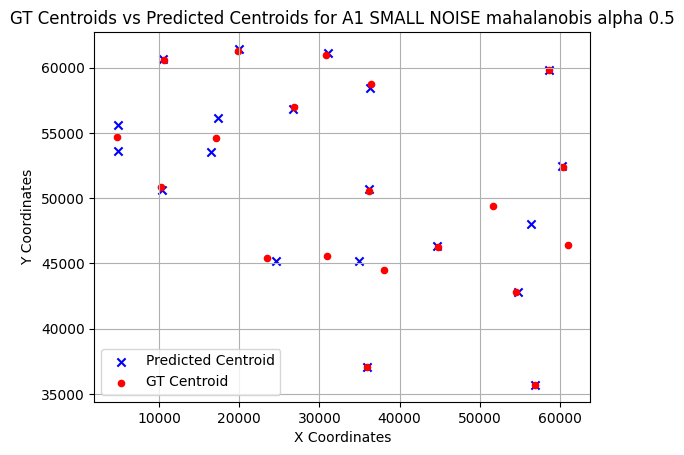


Average Euclidean distance btw predicted & GT centroids: 800.4833769508815

Percentage of centroids in radius of GT centroids within epsilon:65.000%


In [ ]:
X = df_a1_small_noise.iloc[:, :2].values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=20, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print()
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=20, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    print()
    ground_truth_clusters = df_a1_small_noise['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()
    evaluation_centroids(gt_centroids_a1,model_centroids,"A1 SMALL NOISE "+a +" alpha "+str(b), epsilon=700)


Silhouette Score:  0.5176617697758876

Adjusted Rand Index (ARI): 0.8324458291279209

---RESULTS FOR A1 LARGE NOISE euclidean alpha 1---



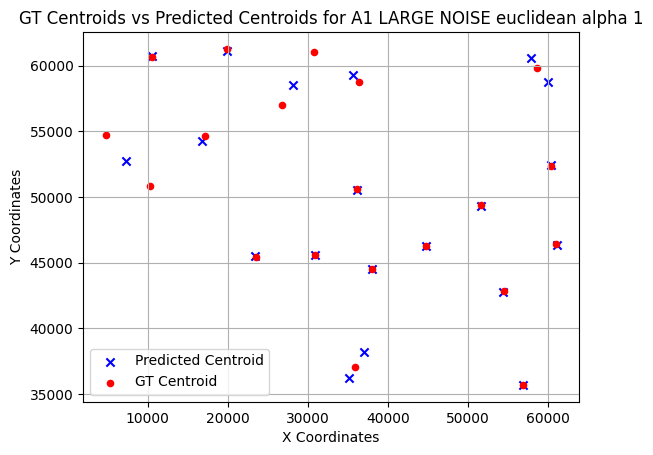


Average Euclidean distance btw predicted & GT centroids: 668.0045706514722

Percentage of centroids in radius of GT centroids within epsilon:65.000%

Silhouette Score:  0.5181561144831971

Adjusted Rand Index (ARI): 0.8318958054744974

---RESULTS FOR A1 LARGE NOISE euclidean alpha 0.75---



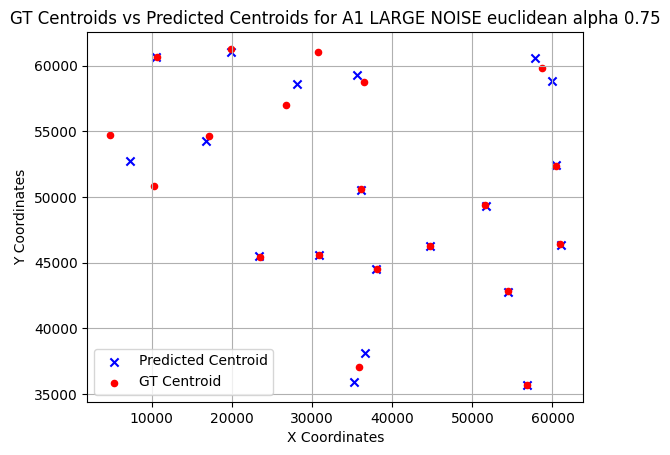


Average Euclidean distance btw predicted & GT centroids: 649.6642280337239

Percentage of centroids in radius of GT centroids within epsilon:65.000%

Silhouette Score:  0.5175447037402213

Adjusted Rand Index (ARI): 0.8320154873808417

---RESULTS FOR A1 LARGE NOISE euclidean alpha 0.5---



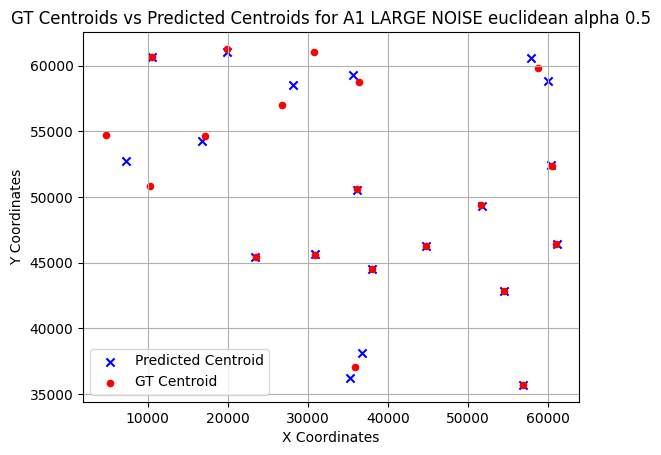


Average Euclidean distance btw predicted & GT centroids: 639.9929545822202

Percentage of centroids in radius of GT centroids within epsilon:65.000%

Silhouette Score:  0.4542380726023075

Adjusted Rand Index (ARI): 0.7364669888554519

---RESULTS FOR A1 LARGE NOISE mahalanobis alpha 1---



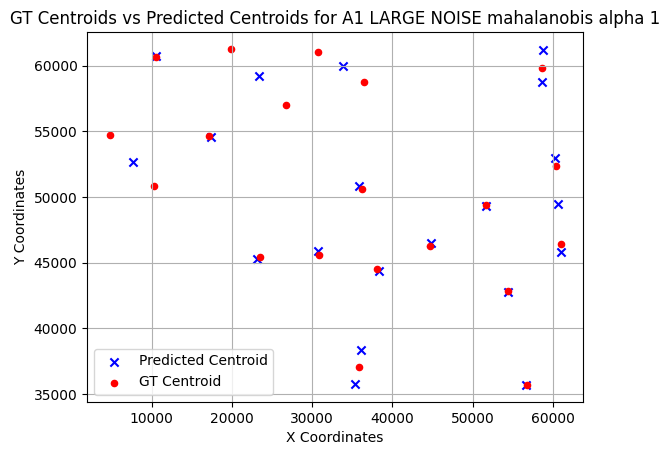


Average Euclidean distance btw predicted & GT centroids: 1096.960108425504

Percentage of centroids in radius of GT centroids within epsilon:60.000%

Silhouette Score:  0.45524669973361787

Adjusted Rand Index (ARI): 0.7386233035202994

---RESULTS FOR A1 LARGE NOISE mahalanobis alpha 0.75---



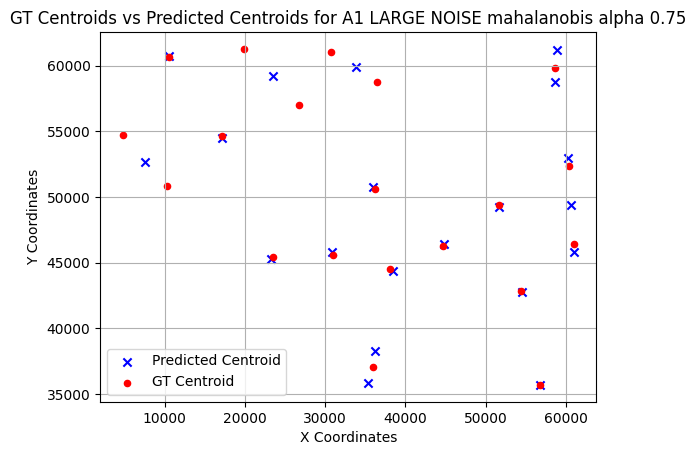


Average Euclidean distance btw predicted & GT centroids: 1065.1475526453487

Percentage of centroids in radius of GT centroids within epsilon:60.000%

Silhouette Score:  0.4559226288786012

Adjusted Rand Index (ARI): 0.7407206990729366

---RESULTS FOR A1 LARGE NOISE mahalanobis alpha 0.5---



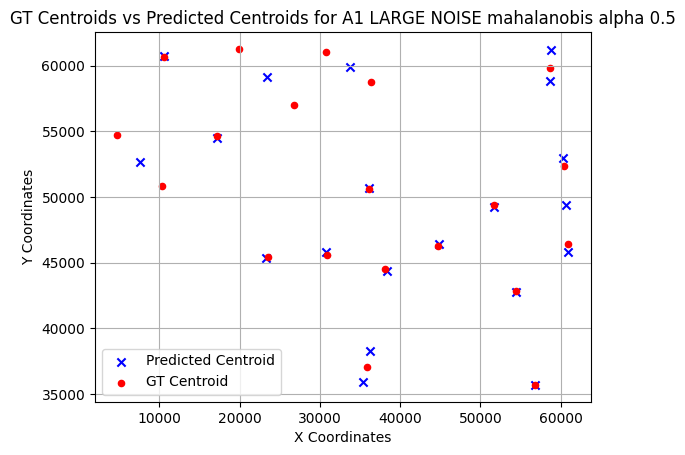


Average Euclidean distance btw predicted & GT centroids: 1039.2032343550263

Percentage of centroids in radius of GT centroids within epsilon:60.000%


In [ ]:
X = df_a1_large_noise.iloc[:, :2].values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=20, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print()
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=20, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    print()
    ground_truth_clusters = df_a1_large_noise['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()
    evaluation_centroids(gt_centroids_a1,model_centroids,"A1 LARGE NOISE "+a +" alpha "+str(b), epsilon=700)

### A2

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (13). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5267769854007659

Adjusted Rand Index (ARI): 0.8652923578666915

---RESULTS FOR A2 SMALL NOISE euclidean alpha 1---



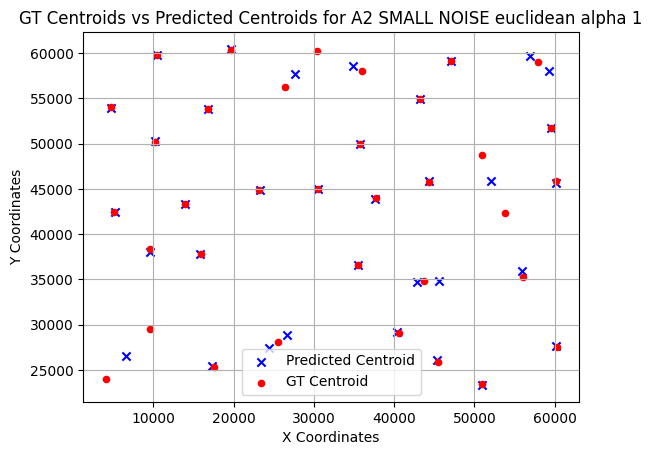


Average Euclidean distance btw predicted & GT centroids: 606.3037072238322

Percentage of centroids in radius of GT centroids within epsilon:74.286%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (13). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (19). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5269810837362893

Adjusted Rand Index (ARI): 0.8652197549742381

---RESULTS FOR A2 SMALL NOISE euclidean alpha 0.75---



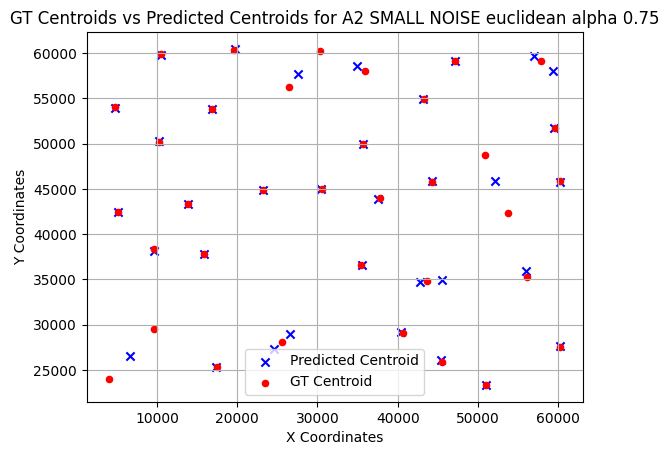


Average Euclidean distance btw predicted & GT centroids: 598.84711539925

Percentage of centroids in radius of GT centroids within epsilon:74.286%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (13). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (19). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.527084399987423

Adjusted Rand Index (ARI): 0.8650057847272046

---RESULTS FOR A2 SMALL NOISE euclidean alpha 0.5---



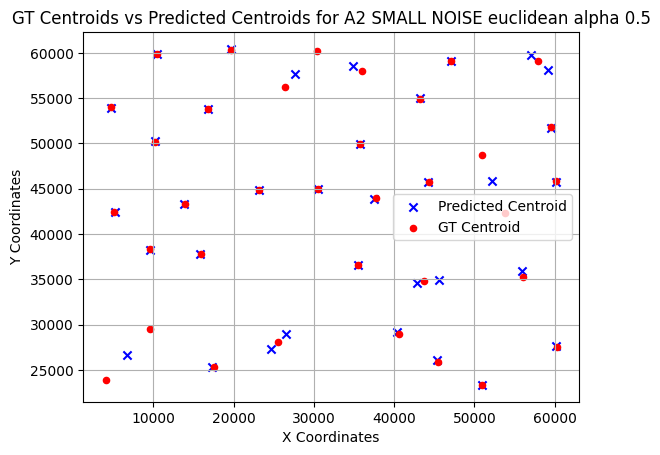


Average Euclidean distance btw predicted & GT centroids: 595.9481139014323

Percentage of centroids in radius of GT centroids within epsilon:74.286%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.541533444984838

Adjusted Rand Index (ARI): 0.8868626513537837

---RESULTS FOR A2 SMALL NOISE mahalanobis alpha 1---



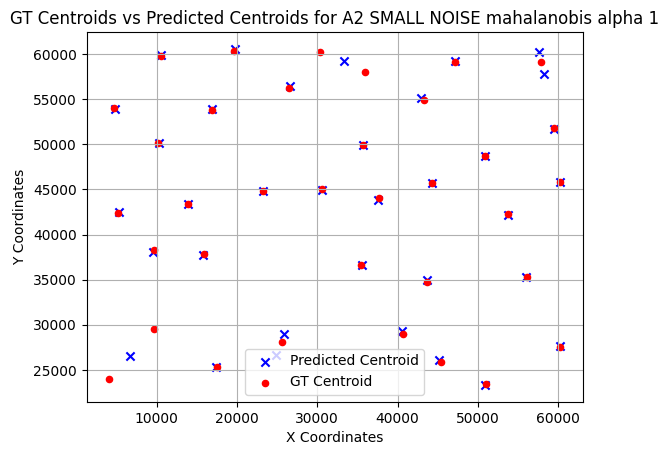


Average Euclidean distance btw predicted & GT centroids: 451.31472357164057

Percentage of centroids in radius of GT centroids within epsilon:82.857%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5415621127327261

Adjusted Rand Index (ARI): 0.8867352033323345

---RESULTS FOR A2 SMALL NOISE mahalanobis alpha 0.75---



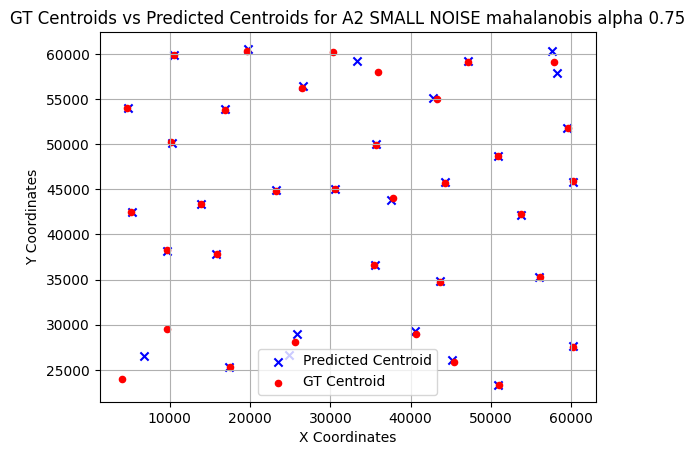


Average Euclidean distance btw predicted & GT centroids: 443.4577818263306

Percentage of centroids in radius of GT centroids within epsilon:82.857%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.516120016857017

Adjusted Rand Index (ARI): 0.8467028244594796

---RESULTS FOR A2 SMALL NOISE mahalanobis alpha 0.5---



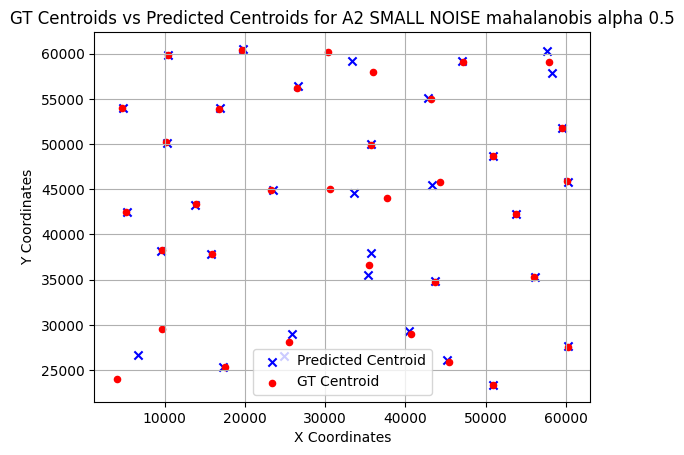


Average Euclidean distance btw predicted & GT centroids: 625.0185073186841

Percentage of centroids in radius of GT centroids within epsilon:74.286%


In [ ]:
X = df_a2_small_noise.iloc[:, :2].values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=35, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print()
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=35, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    print()
    ground_truth_clusters = df_a2_small_noise['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()
    evaluation_centroids(gt_centroids_a2,model_centroids,"A2 SMALL NOISE "+a +" alpha "+str(b), epsilon=950)


Silhouette Score:  0.5129119504263084

Adjusted Rand Index (ARI): 0.8077282726561835

---RESULTS FOR A2 LARGE NOISE euclidean alpha 1---



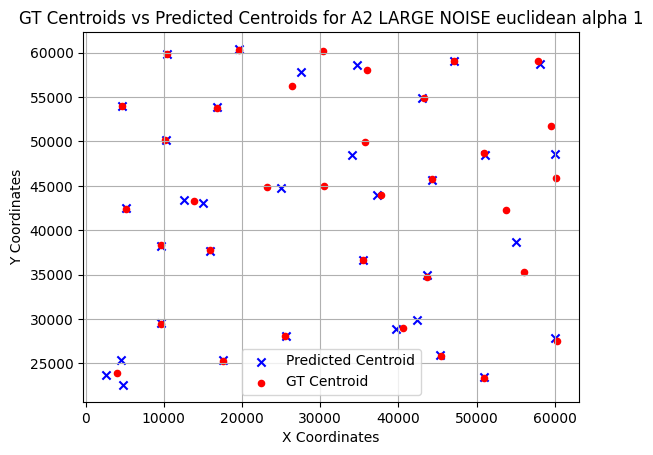


Average Euclidean distance btw predicted & GT centroids: 755.5592751243054

Percentage of centroids in radius of GT centroids within epsilon:62.857%

Silhouette Score:  0.5131149294874614

Adjusted Rand Index (ARI): 0.8076420078975382

---RESULTS FOR A2 LARGE NOISE euclidean alpha 0.75---



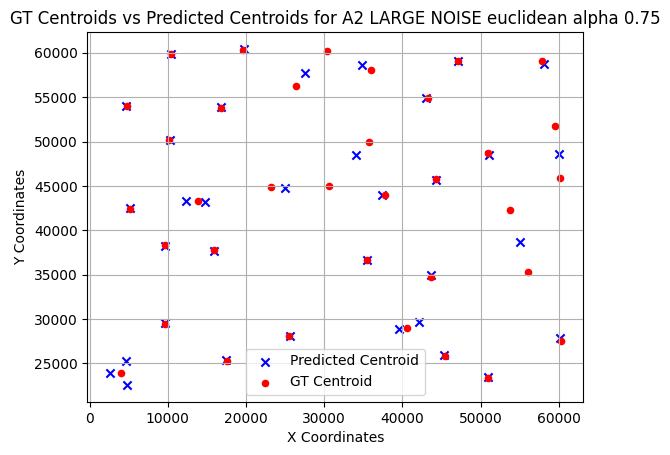


Average Euclidean distance btw predicted & GT centroids: 742.1406375113723

Percentage of centroids in radius of GT centroids within epsilon:65.714%

Silhouette Score:  0.5127111700275182

Adjusted Rand Index (ARI): 0.8072933841984999

---RESULTS FOR A2 LARGE NOISE euclidean alpha 0.5---



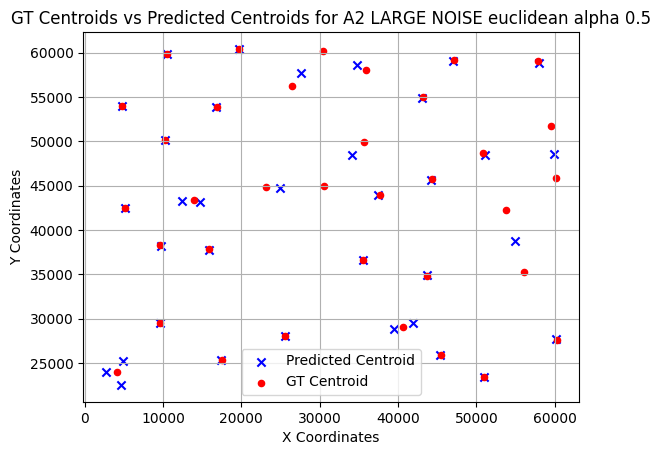


Average Euclidean distance btw predicted & GT centroids: 731.5089684378221

Percentage of centroids in radius of GT centroids within epsilon:65.714%

Silhouette Score:  0.5046702965716935

Adjusted Rand Index (ARI): 0.8146795441653369

---RESULTS FOR A2 LARGE NOISE mahalanobis alpha 1---



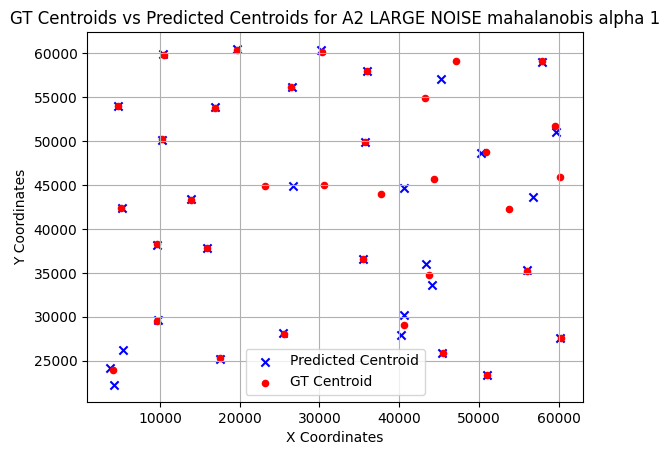


Average Euclidean distance btw predicted & GT centroids: 729.8456205701495

Percentage of centroids in radius of GT centroids within epsilon:71.429%

Silhouette Score:  0.5045534024920443

Adjusted Rand Index (ARI): 0.8141601770648103

---RESULTS FOR A2 LARGE NOISE mahalanobis alpha 0.75---



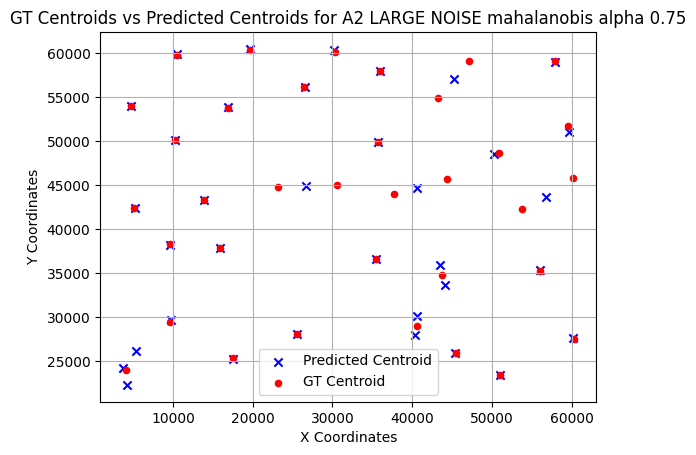


Average Euclidean distance btw predicted & GT centroids: 720.43128936607

Percentage of centroids in radius of GT centroids within epsilon:71.429%

Silhouette Score:  0.5040026694530838

Adjusted Rand Index (ARI): 0.8144839916324625

---RESULTS FOR A2 LARGE NOISE mahalanobis alpha 0.5---



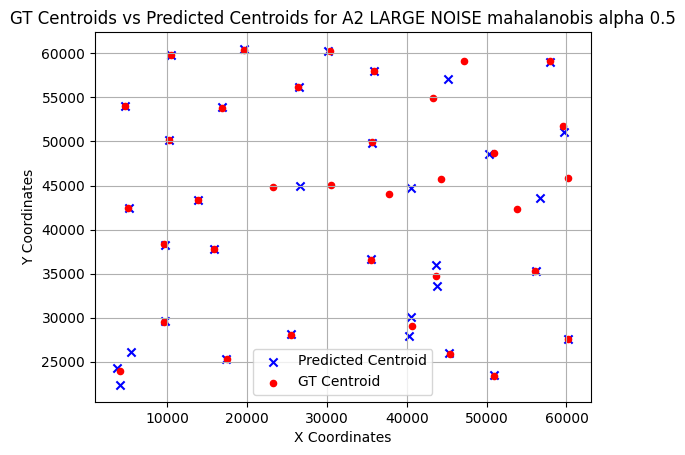


Average Euclidean distance btw predicted & GT centroids: 713.7753874777212

Percentage of centroids in radius of GT centroids within epsilon:71.429%


In [ ]:
X = df_a2_large_noise.iloc[:, :2].values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=35, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print()
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=35, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    print()
    ground_truth_clusters = df_a2_large_noise['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()
    evaluation_centroids(gt_centroids_a2,model_centroids,"A2 LARGE NOISE "+a +" alpha "+str(b), epsilon=950)

### A3


Silhouette Score:  0.5419351216823072

Adjusted Rand Index (ARI): 0.8776952137778987

---RESULTS FOR A3 SMALL NOISE euclidean alpha 1---



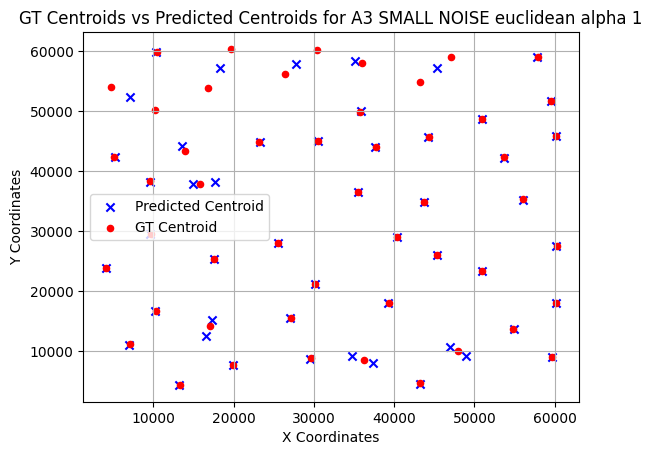


Average Euclidean distance btw predicted & GT centroids: 524.0806740554017

Percentage of centroids in radius of GT centroids within epsilon:84.000%

Silhouette Score:  0.5422748845608354

Adjusted Rand Index (ARI): 0.8773186794942478

---RESULTS FOR A3 SMALL NOISE euclidean alpha 0.75---



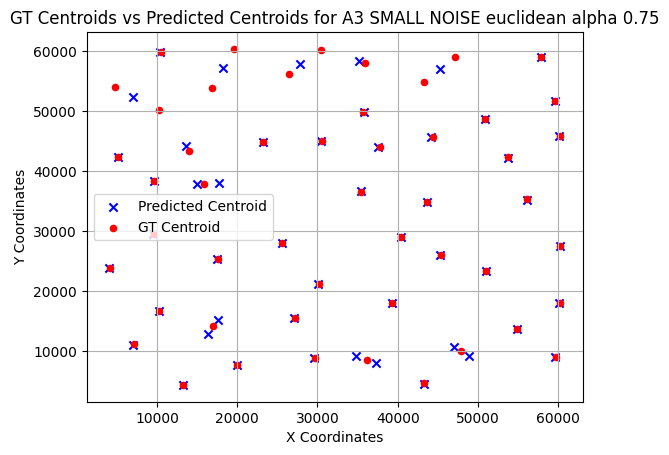


Average Euclidean distance btw predicted & GT centroids: 517.5396632201036

Percentage of centroids in radius of GT centroids within epsilon:84.000%

Silhouette Score:  0.5417411568120226

Adjusted Rand Index (ARI): 0.8769531201627329

---RESULTS FOR A3 SMALL NOISE euclidean alpha 0.5---



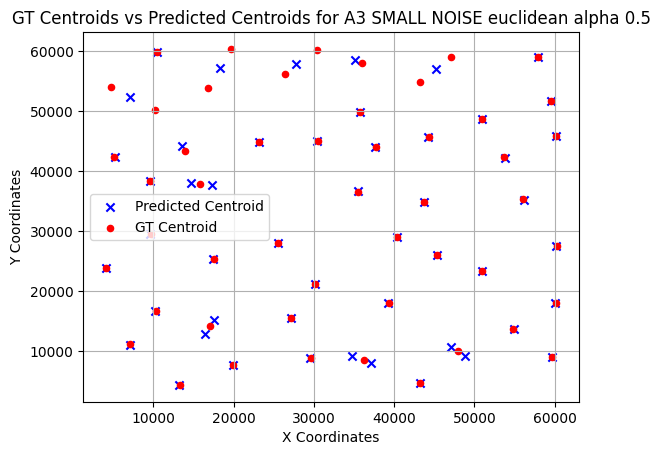


Average Euclidean distance btw predicted & GT centroids: 514.5533971836684

Percentage of centroids in radius of GT centroids within epsilon:84.000%

Silhouette Score:  0.542338126213127

Adjusted Rand Index (ARI): 0.8776472943101735

---RESULTS FOR A3 SMALL NOISE mahalanobis alpha 1---



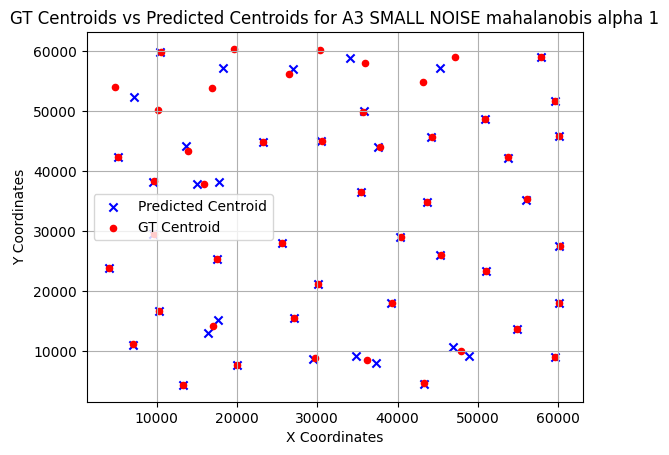


Average Euclidean distance btw predicted & GT centroids: 525.7480884778864

Percentage of centroids in radius of GT centroids within epsilon:84.000%

Silhouette Score:  0.5423019612136222

Adjusted Rand Index (ARI): 0.8773494736953735

---RESULTS FOR A3 SMALL NOISE mahalanobis alpha 0.75---



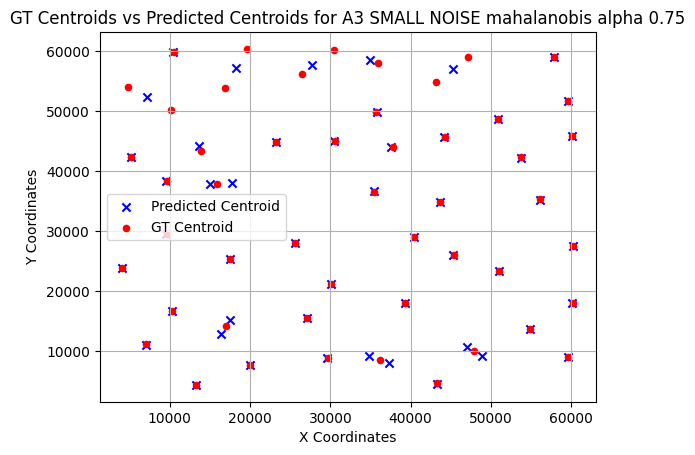


Average Euclidean distance btw predicted & GT centroids: 518.4491180351415

Percentage of centroids in radius of GT centroids within epsilon:84.000%

Silhouette Score:  0.5419102904269575

Adjusted Rand Index (ARI): 0.8771299121934436

---RESULTS FOR A3 SMALL NOISE mahalanobis alpha 0.5---



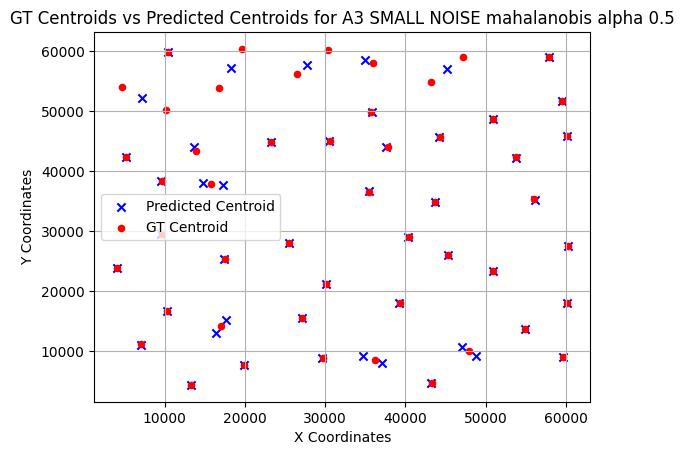


Average Euclidean distance btw predicted & GT centroids: 513.8208198461089

Percentage of centroids in radius of GT centroids within epsilon:84.000%


In [ ]:
X = df_a3_small_noise.iloc[:, :2].values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=50, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print()
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=50, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    print()
    ground_truth_clusters = df_a3_small_noise['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()
    evaluation_centroids(gt_centroids_a3,model_centroids,"A3 SMALL NOISE "+a +" alpha "+str(b), epsilon=1250)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (11). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (17). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5224462072953546

Adjusted Rand Index (ARI): 0.8087986871209661

---RESULTS FOR A3 LARGE NOISE euclidean alpha 1---



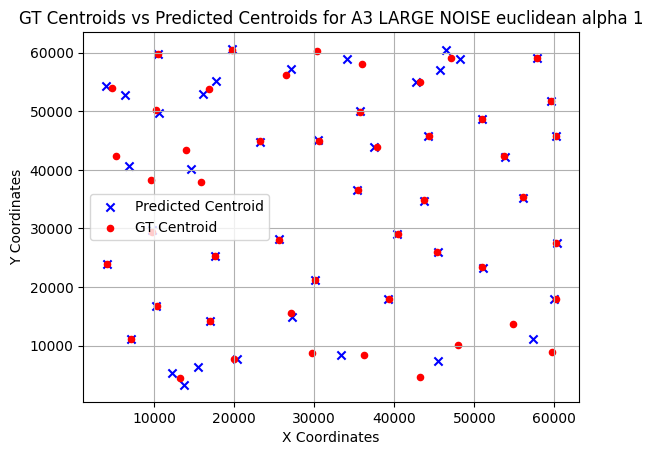


Average Euclidean distance btw predicted & GT centroids: 779.7736245265276

Percentage of centroids in radius of GT centroids within epsilon:76.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (11). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (17). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5294386801503503

Adjusted Rand Index (ARI): 0.8328571876677374

---RESULTS FOR A3 LARGE NOISE euclidean alpha 0.75---



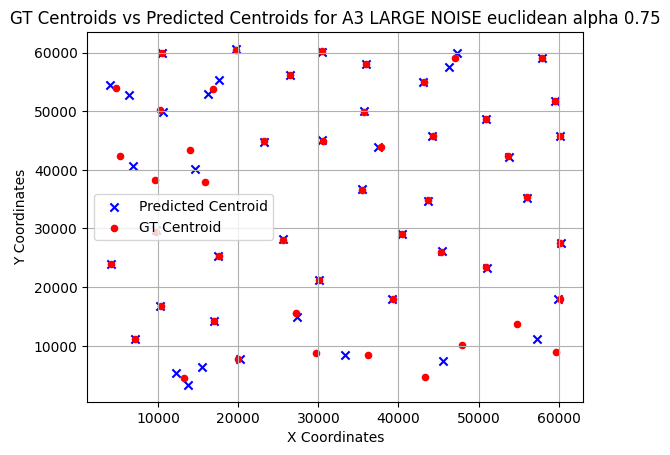


Average Euclidean distance btw predicted & GT centroids: 654.7082264416085

Percentage of centroids in radius of GT centroids within epsilon:80.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (11). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (17). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5339689212697407

Adjusted Rand Index (ARI): 0.8374444816596629

---RESULTS FOR A3 LARGE NOISE euclidean alpha 0.5---



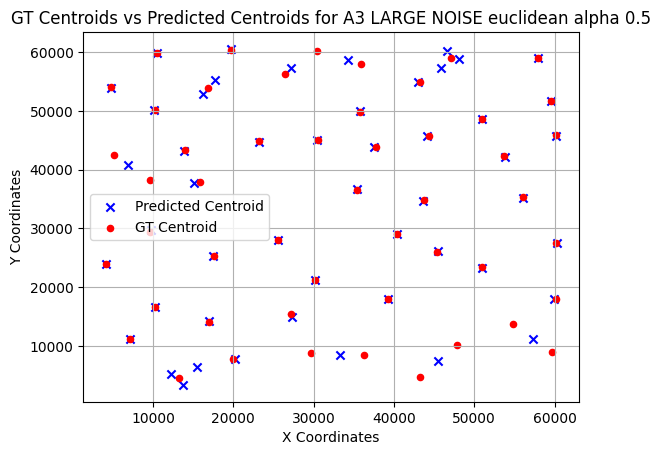


Average Euclidean distance btw predicted & GT centroids: 647.7286187120287

Percentage of centroids in radius of GT centroids within epsilon:80.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (11). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (17). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5295772021155465

Adjusted Rand Index (ARI): 0.8327069896957395

---RESULTS FOR A3 LARGE NOISE mahalanobis alpha 1---



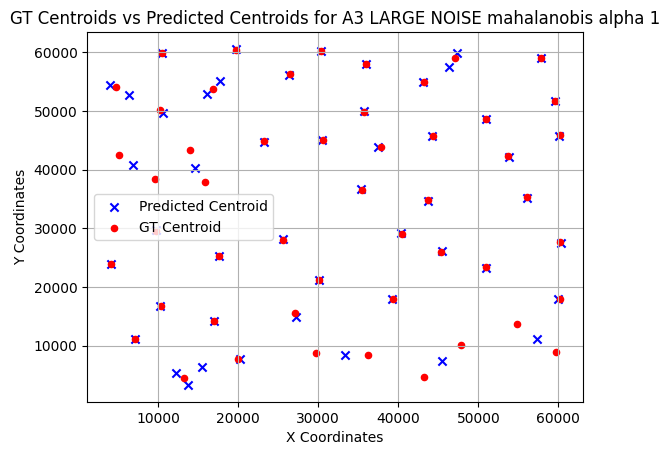


Average Euclidean distance btw predicted & GT centroids: 661.9457443797006

Percentage of centroids in radius of GT centroids within epsilon:80.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (11). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (17). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5295521660664528

Adjusted Rand Index (ARI): 0.8336954086627343

---RESULTS FOR A3 LARGE NOISE mahalanobis alpha 0.75---



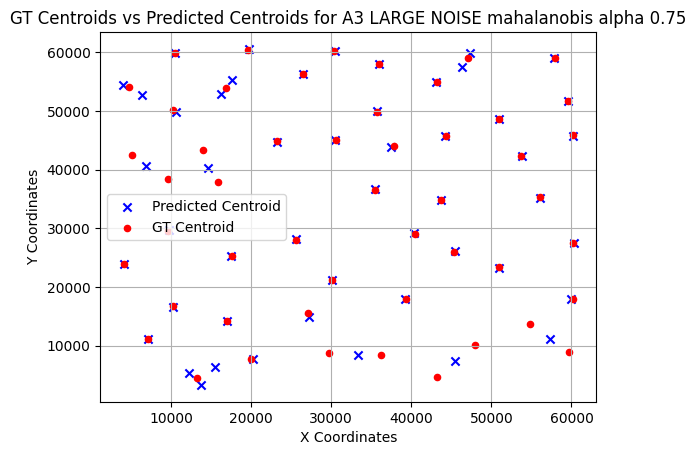


Average Euclidean distance btw predicted & GT centroids: 654.0108894455057

Percentage of centroids in radius of GT centroids within epsilon:80.000%



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (11). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (17). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.5236773507443786

Adjusted Rand Index (ARI): 0.8121507399567686

---RESULTS FOR A3 LARGE NOISE mahalanobis alpha 0.5---



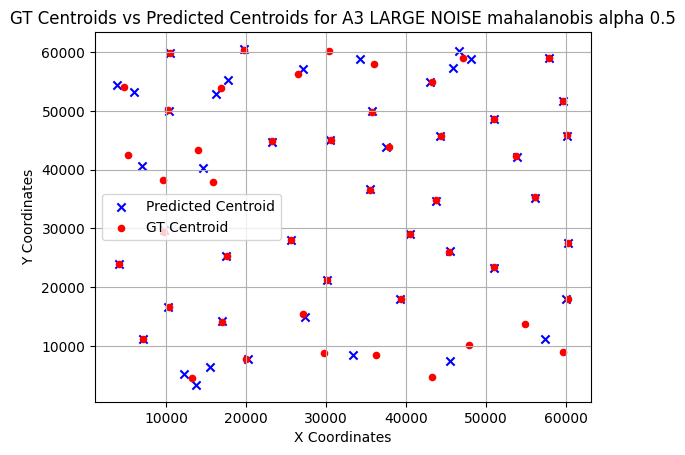


Average Euclidean distance btw predicted & GT centroids: 736.7676950935443

Percentage of centroids in radius of GT centroids within epsilon:78.000%


In [ ]:
X = df_a3_large_noise.iloc[:, :2].values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=50, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print()
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=50, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    print()
    ground_truth_clusters = df_a3_large_noise['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()
    evaluation_centroids(gt_centroids_a3,model_centroids,"A3 LARGE NOISE "+a +" alpha "+str(b), epsilon=1250)

## Iris Datasets

In [ ]:
iris = load_iris()
data_iris = iris.data
target_iris = iris.target

df_iris = pd.DataFrame(data_iris, columns=['Dim1', 'Dim2', 'Dim3',"Dim4"])

df_GT_iris=df_iris.copy()
df_GT_iris["GT_Cluster"]=target_iris

In [ ]:
info_data(df_iris, "IRIS")

--INFORMATION ON IRIS--
Lenght of dataset: 150
No of columns/Dimension of data: 4
Data types: Dim1    float64
Dim2    float64
Dim3    float64
Dim4    float64
dtype: object
Summary statistics:
              Dim1        Dim2        Dim3        Dim4
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000



In [ ]:
gt_info(df_GT_iris, "IRIS")

---FOR THE IRIS DATASET---
Average number of instances in a cluster: 50.0
Number of instances in the smallest cluster: 50
Number of instances in the largest cluster: 50



In [ ]:
X = df_iris.values
initial_centroids = X[np.random.choice(range(X.shape[0]), size=4, replace=False)]
distances= ["euclidean","mahalanobis"]
alphas=[1,0.75,0.5]
for a in distances:
  for b in alphas:
    print("-------")
    print("Distance Metric:",a)
    print("Lambda:", b)
    model_centroids, pred_cluster = weighted_kmeans(X,initial_centroids, k=4, alpha=b, distance_metric=a,max_iterations=500)
    sscore = silhouette_score(X, pred_cluster, metric='euclidean')
    print('Silhouette Score: ', sscore)
    ground_truth_clusters = df_GT_iris['GT_Cluster'].values
    ari = adjusted_rand_score(ground_truth_clusters, pred_cluster)
    print(f"Adjusted Rand Index (ARI): {ari}")
    print()

-------
Distance Metric: euclidean
Lambda: 1
Silhouette Score:  0.4089860717743068
Adjusted Rand Index (ARI): 0.587644549230942

-------
Distance Metric: euclidean
Lambda: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (14). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (16). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbo

Silhouette Score:  0.4089860717743068
Adjusted Rand Index (ARI): 0.587644549230942

-------
Distance Metric: euclidean
Lambda: 0.5
Silhouette Score:  0.4089860717743068
Adjusted Rand Index (ARI): 0.587644549230942

-------
Distance Metric: mahalanobis
Lambda: 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (19). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.28992909932413474
Adjusted Rand Index (ARI): 0.5236980867639361

-------
Distance Metric: mahalanobis
Lambda: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (19). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (18). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (19). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


Silhouette Score:  0.28992909932413474
Adjusted Rand Index (ARI): 0.5236980867639361

-------
Distance Metric: mahalanobis
Lambda: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (19). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (18). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (19). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (18). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighb

Silhouette Score:  0.28733841136225713
Adjusted Rand Index (ARI): 0.5020475405977877



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (18). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
